In [1]:
from Yugiquery import *
header('Timeline')

<div align='center'>
    <br>
    <!-- Pre Style needed to fix HTML formatting -->
    <pre style="line-height: var(--jp-code-line-height); font-family: var(--jp-code-font-family)">
    ██    ██ ██    ██  ██████  ██  ██████  ██    ██ ███████ ██████  ██    ██ 
     ██  ██  ██    ██ ██       ██ ██    ██ ██    ██ ██      ██   ██  ██  ██  
      ████   ██    ██ ██   ███ ██ ██    ██ ██    ██ █████   ██████    ████   
       ██    ██    ██ ██    ██ ██ ██ ▄▄ ██ ██    ██ ██      ██   ██    ██    
       ██     ██████   ██████  ██  ██████   ██████  ███████ ██   ██    ██    
                                      ▀▀                                     
    </pre>
</div>
<div align='right'>
    Timeline - Last modified: 23/12/2022 19:11 UTC <br>
    By <b>Guilherme Ruiz</b>
</div>

# Load data

In [2]:
# Get list of files
all_cards_files = sorted(glob.glob('../Data/All_cards_*.csv'), key=os.path.getctime, reverse=True)
set_lists_files = sorted(glob.glob('../Data/All_sets_*.csv'), key=os.path.getctime, reverse=True)
# Get newest file if exist
if len(all_cards_files)>0:
    all_cards_df = pd.read_csv(all_cards_files[0], dtype=object)
    # Correct tuples
    all_cards_df['Effect type'] = all_cards_df['Effect type'].dropna().apply(literal_eval)
    all_cards_df['Link Arrows'] = all_cards_df['Link Arrows'].dropna().apply(literal_eval)
    all_cards_df['Archseries'] = all_cards_df['Archseries'].dropna().apply(literal_eval)
    all_cards_df['Artwork'] = all_cards_df['Artwork'].dropna().apply(literal_eval)
    all_cards_df['Errata'] = all_cards_df['Errata'].dropna().apply(literal_eval)
    print('Cards file loaded')
else:
    all_cards_df = None
    print('No cards files')
    
if len(set_lists_files)>0:
    set_lists_df = pd.read_csv(set_lists_files[0], dtype=object)
    # Correct tuples
    set_lists_df['Rarity'] = set_lists_df['Rarity'].dropna().apply(literal_eval)
    set_lists_df['Cover card'] = set_lists_df['Cover card'].dropna().apply(literal_eval)
    print('Sets file loaded')
else:
    set_lists_df = None
    print('No set lists files')

Cards file loaded
Sets file loaded


In [3]:
if all_cards_df is not None and set_lists_df is not None:
    all_cards_df['index'] = all_cards_df['Name'].str.lower()
    set_lists_df['index'] = set_lists_df['Name'].str.lower()
    all_cards_df['Modification date'] = pd.to_datetime(all_cards_df['Modification date'])
    set_lists_df['Modification date'] = pd.to_datetime(set_lists_df['Modification date'])
    set_lists_df['Release'] = pd.to_datetime(set_lists_df['Release'])
    full_df = all_cards_df.merge(set_lists_df, indicator = True, how='outer', on='index')
    full_df = full_df.convert_dtypes()
    full_df['Modification date'] = full_df[['Modification date_x','Modification date_y']].max(axis=1)
    full_df['Name'] = full_df['Name_x'].fillna(full_df['Name_y'])
    full_df.drop(['index', 'Name_x', 'Name_y', 'Modification date_x', 'Modification date_y'], axis=1, inplace = True)
    full_df = full_df[np.append(full_df.columns[-1:],full_df.columns[:-1])]
    
else:
    raise SystemExit("Not enough files to proceed. Aborting!")

# Data visualization

In [4]:
pd.set_option('display.max_columns', 40)
full_df

Name  Password   Card type  \
0               "A" Cell Breeding Device  34541863  Spell Card   
1               "A" Cell Breeding Device  34541863  Spell Card   
2               "A" Cell Breeding Device  34541863  Spell Card   
3               "A" Cell Breeding Device  34541863  Spell Card   
4               "A" Cell Breeding Device  34541863  Spell Card   
...                                  ...       ...         ...   
155116                 Magiquartet Shock      <NA>        <NA>   
155117                 Magiquartet Shock      <NA>        <NA>   
155118  Ultimate Flag Beast Surge Bicorn      <NA>        <NA>   
155119                   The☆Star Dragon      <NA>        <NA>   
155120                  Handsray Destleo      <NA>        <NA>   

                     Property Primary type Secondary type Attribute  \
0       Continuous Spell Card         <NA>           <NA>      <NA>   
1       Continuous Spell Card         <NA>           <NA>      <NA>   
2       Continuous Spell Card         <NA>           <NA>      <NA>   
3       Continuous Spell Card         <NA>           <NA>      <NA>   
4       Continuous Spell Card         <NA>           <NA>      <NA>   
...                       ...          ...            ...       ...   
155116                   <NA>         <NA>           <NA>      <NA>   
155117                   <NA>         <NA>           <NA>      <NA>   
155118                   <NA>         <NA>           <NA>      <NA>   
155119                   <NA>         <NA>           <NA>      <NA>   
155120                   <NA>         <NA>           <NA>      <NA>   

       Monster type Level/Rank   ATK   DEF Pendulum Scale  Link Link Arrows  \
0              <NA>       <NA>  <NA>  <NA>           <NA>  <NA>         NaN   
1              <NA>       <NA>  <NA>  <NA>           <NA>  <NA>         NaN   
2              <NA>       <NA>  <NA>  <NA>           <NA>  <NA>         NaN   
3              <NA>       <NA>  <NA>  <NA>           <NA>  <NA>         NaN   
4              <NA>       <NA>  <NA>  <NA>           <NA>  <NA>         NaN   
...             ...        ...   ...   ...            ...   ...         ...   
155116         <NA>       <NA>  <NA>  <NA>           <NA>  <NA>         NaN   
155117         <NA>       <NA>  <NA>  <NA>           <NA>  <NA>         NaN   
155118         <NA>       <NA>  <NA>  <NA>           <NA>  <NA>         NaN   
155119         <NA>       <NA>  <NA>  <NA>           <NA>  <NA>         NaN   
155120         <NA>       <NA>  <NA>  <NA>           <NA>  <NA>         NaN   

              Effect type Archseries Artwork   Errata TCG status OCG status  \
0       (Trigger Effect,)        NaN     NaN  (Name,)  Unlimited  Unlimited   
1       (Trigger Effect,)        NaN     NaN  (Name,)  Unlimited  Unlimited   
2       (Trigger Effect,)        NaN     NaN  (Name,)  Unlimited  Unlimited   
3       (Trigger Effect,)        NaN     NaN  (Name,)  Unlimited  Unlimited   
4       (Trigger Effect,)        NaN     NaN  (Name,)  Unlimited  Unlimited   
...                   ...        ...     ...      ...        ...        ...   
155116                NaN        NaN     NaN      NaN       <NA>       <NA>   
155117                NaN        NaN     NaN      NaN       <NA>       <NA>   
155118                NaN        NaN     NaN      NaN       <NA>       <NA>   
155119                NaN        NaN     NaN      NaN       <NA>       <NA>   
155120                NaN        NaN     NaN      NaN       <NA>       <NA>   

                                    Set    Card number  \
0                  Force of the Breaker     FOTB-KR043   
1                  Force of the Breaker     FOTB-EN043   
2                  Force of the Breaker     FOTB-IT043   
3                  Force of the Breaker     FOTB-FR043   
4                  Force of the Breaker     FOTB-SP043   
...                                 ...            ...   
155116                   Gold Rush Pack  RD/GRP1-JP055   
155117                   Gol

## Releases

In [5]:
release_region=full_df[full_df['Release'].notna()].groupby(['Region','Name'])['Release'].agg(['min','idxmin','max','idxmax'])
release_region

min  idxmin        max  idxmax
Region Name                                                            
AE     3-Hump Lacooda             2004-10-14  113179 2004-10-14  113179
       7                          2004-10-14      74 2004-10-14      74
       7 Colored Fish             2002-10-24  104232 2002-10-24  104232
       8-Claws Scorpion           2003-10-23   76396 2003-10-23   76396
       A Cat of Ill Omen          2003-10-23   80405 2003-10-23   80405
...                                      ...     ...        ...     ...
TC     ZW - Lightning Blade       2015-12-05   76241 2015-12-05   76241
       ZW - Tornado Bringer       2015-12-05  152568 2015-12-05  152568
       ZW - Ultimate Shield       2015-12-05  135403 2015-12-05  135403
       Zerozerock                 2015-12-05   31937 2015-12-05   31937
       Zure, Knight of Dark World 2015-03-01  104211 2015-03-01  104211

[82919 rows x 4 columns]

In [6]:
release=full_df[full_df['Release'].notna()].groupby('Name')['Release'].agg(['min','idxmin','max','idxmax'])
release

min  idxmin        max  idxmax
Name                                                               
"A Legendary Ocean"           2005-07-27  152889 2005-07-27  152889
"A" Cell Breeding Device      2007-02-15       6 2014-03-26       8
"A" Cell Incubator            2007-07-21      13 2012-05-12      17
"A" Cell Recombination Device 2016-07-09      24 2016-11-04      21
"A" Cell Scatter Burst        2006-11-16      31 2014-03-26      34
...                                  ...     ...        ...     ...
Zubaba General                2012-12-22  135705 2016-02-12  135704
Zubaba Knight                 2011-03-19  135706 2013-11-25  135741
Zubababancho Gagagacoat       2019-11-09  135756 2020-02-05  135757
Zure, Knight of Dark World    2005-08-11  104202 2018-06-30  104216
Zushin the Sleeping Giant     2016-05-14  135765 2020-09-10  135766

[12370 rows x 4 columns]

In [7]:
test = release['min'].sort_values().value_counts(sort=False).to_frame(name='All cards')
test.index.name = 'Release'
test

All cards
Release              
1999-03-01         40
1999-03-18          1
1999-04-29          1
1999-05-05          1
1999-05-25         40
...               ...
2022-11-17         12
2022-11-26          7
2023-01-14         38
2023-01-21         22
2023-03-01          2

[703 rows x 1 columns]

In [8]:
test_region = release_region['min'].sort_values().groupby(['Region']).value_counts(sort=False).unstack(0)
test_region.index.name = 'Release'
test_region

Region      AE  DE   EN  EU  FC  FR  IT  JA    JP  KR  PT   SC  SP  TC
Release                                                               
1999-03-01 NaN NaN  NaN NaN NaN NaN NaN NaN  40.0 NaN NaN  NaN NaN NaN
1999-03-18 NaN NaN  NaN NaN NaN NaN NaN NaN   1.0 NaN NaN  NaN NaN NaN
1999-04-29 NaN NaN  NaN NaN NaN NaN NaN NaN   1.0 NaN NaN  NaN NaN NaN
1999-05-05 NaN NaN  NaN NaN NaN NaN NaN NaN   1.0 NaN NaN  NaN NaN NaN
1999-05-25 NaN NaN  NaN NaN NaN NaN NaN NaN  40.0 NaN NaN  NaN NaN NaN
...         ..  ..  ...  ..  ..  ..  ..  ..   ...  ..  ..  ...  ..  ..
2023-01-14 NaN NaN  NaN NaN NaN NaN NaN NaN  38.0 NaN NaN  NaN NaN NaN
2023-01-19 NaN NaN  3.0 NaN NaN NaN NaN NaN   NaN NaN NaN  NaN NaN NaN
2023-01-21 NaN NaN  NaN NaN NaN NaN NaN NaN  22.0 NaN NaN  NaN NaN NaN
2023-02-25 NaN NaN  NaN NaN NaN NaN NaN NaN   NaN NaN NaN  2.0 NaN NaN
2023-03-01 NaN NaN  NaN NaN NaN NaN NaN NaN   2.0 NaN NaN  NaN NaN NaN

[1391 rows x 14 columns]

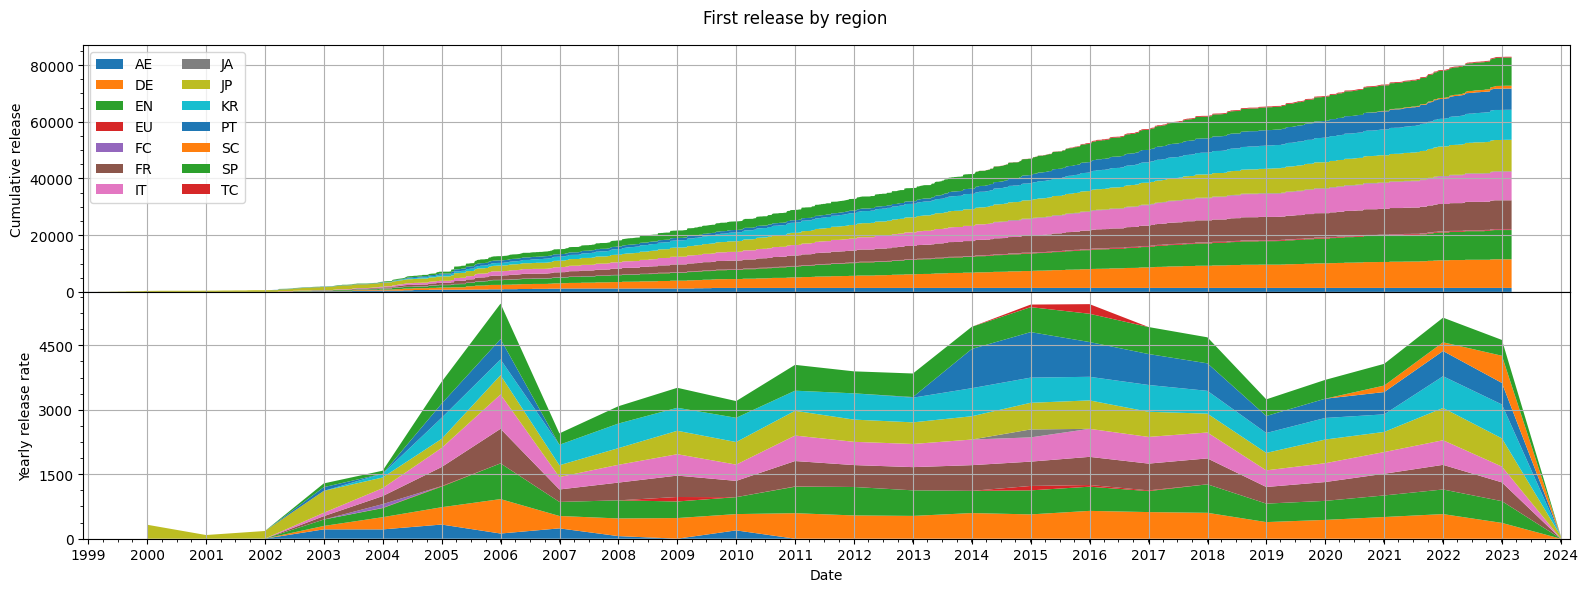

In [11]:
rate_plot(test_region, title='First release', cumsum=True)

In [10]:
full_df.iloc[release_region['idxmin']['JP']['Dark Magician']]

Name                                Dark Magician
Password                                 46986414
Card type                            Monster Card
Property                                     <NA>
Primary type                       Normal Monster
Secondary type                               <NA>
Attribute                                    DARK
Monster type                          Spellcaster
Level/Rank                                      7
ATK                                          2500
DEF                                          2100
Pendulum Scale                               <NA>
Link                                         <NA>
Link Arrows                                   NaN
Effect type                                   NaN
Archseries           (Dark Magician (archetype),)
Artwork                              (Alternate,)
Errata                               (Name, Type)
TCG status                              Unlimited
OCG status                              Unlimited


### By card type

In [11]:
test = full_df.groupby(['Card type','Release'])['Name'].nunique().unstack(0).sort_index().fillna(0)
test.groupby(test.index.strftime('%Y')).sum().T

Release        1999   2000   2001   2002    2003    2004    2005    2006  \
Card type                                                                  
Monster Card  281.0  228.0  197.0  830.0  1242.0  2394.0  2246.0  1737.0   
Spell Card     47.0   65.0   71.0  301.0   407.0   969.0   939.0   735.0   
Trap Card      21.0   25.0   45.0  161.0   323.0   745.0   707.0   569.0   

Release         2007    2008    2009    2010    2011    2012    2013    2014  \
Card type                                                                      
Monster Card  1901.0  1953.0  1786.0  2195.0  2605.0  3609.0  3077.0  3782.0   
Spell Card     783.0   705.0   633.0   577.0   718.0  1030.0   766.0  1045.0   
Trap Card      654.0   595.0   555.0   547.0   623.0   800.0   623.0   872.0   

Release         2015    2016    2017    2018    2019    2020    2021    2022  \
Card type                                                                      
Monster Card  3120.0  3014.0  2170.0  1356.0  1705.0  1252.0  1289.0  1934.0   
Spell Card     961.0   984.0   653.0   479.0   605.0   453.0   529.0   630.0   
Trap Card      729.0   745.0   496.0   296.0   360.0   246.0   250.0   306.0   

Release       2023  
Card type           
Monster Card  36.0  
Spell Card     9.0  
Trap Card      4.0

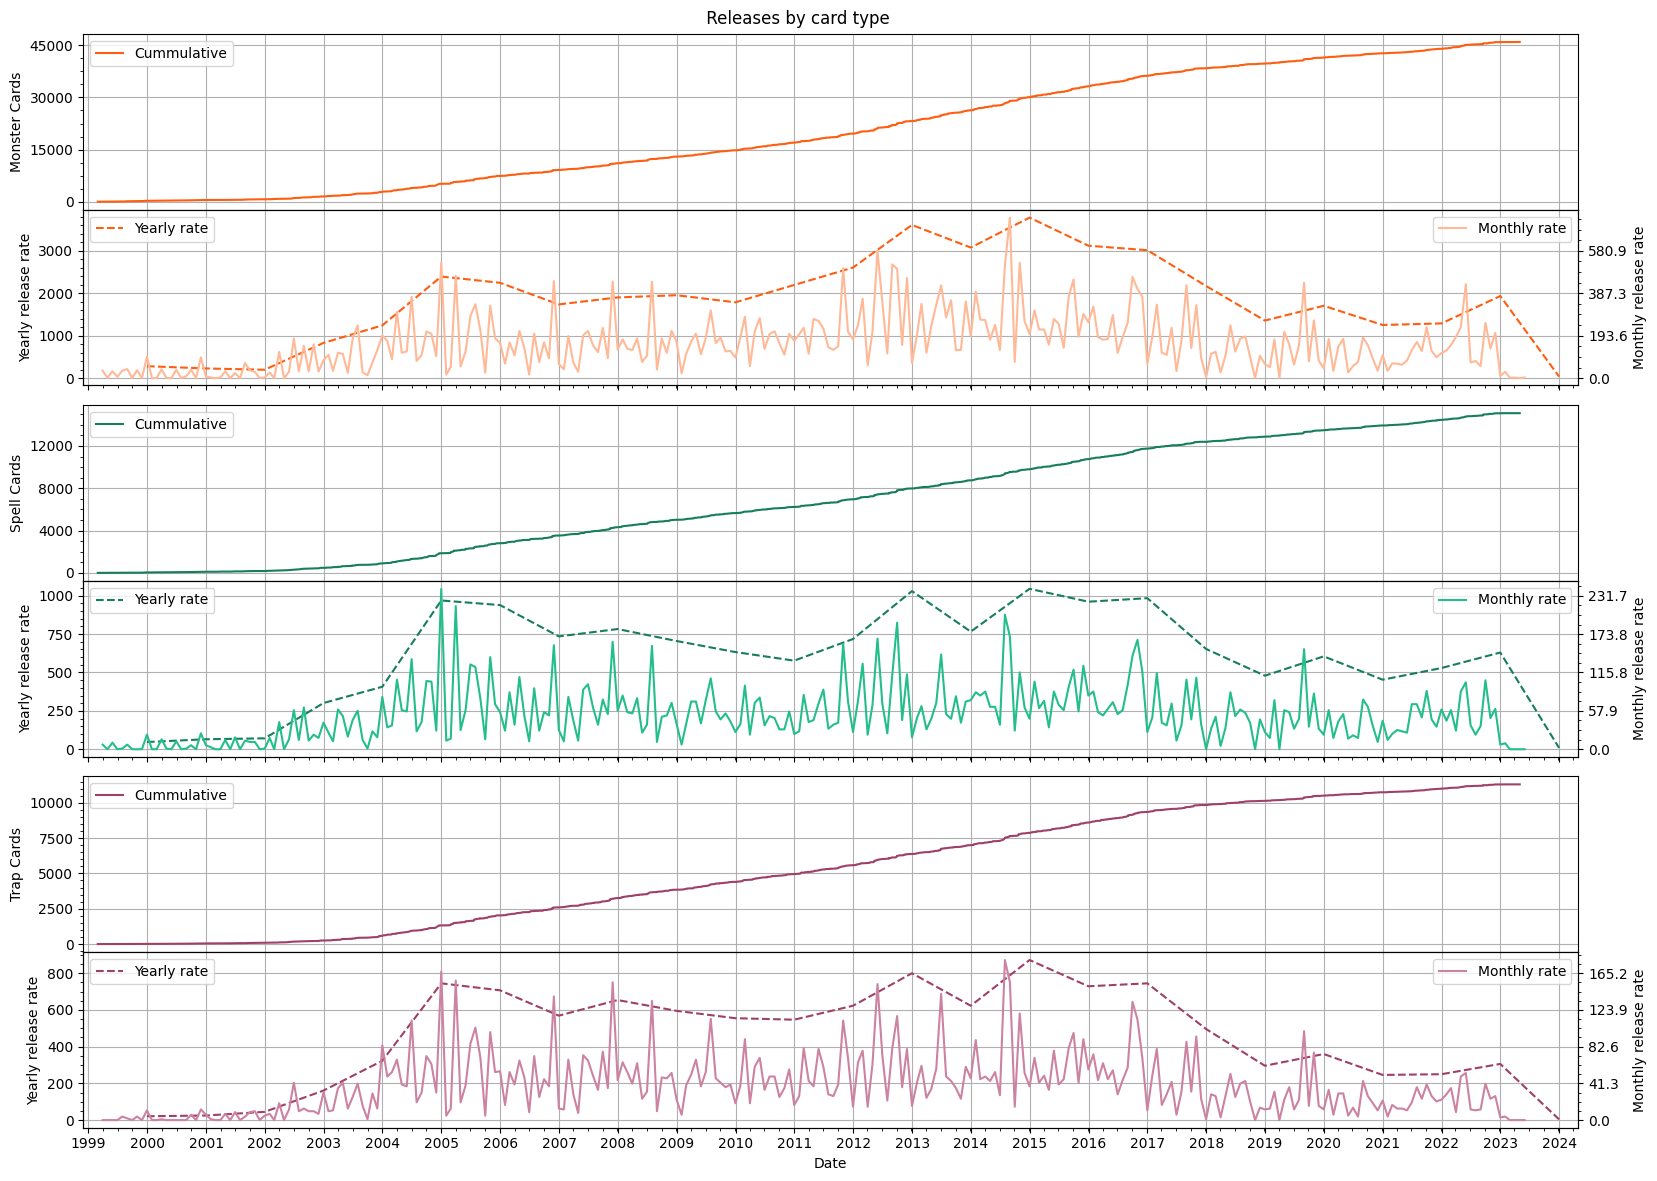

In [12]:
colors = [card_colors[col] for col in test.columns]
rate_subplots(test, colors=colors, cumsum=True)

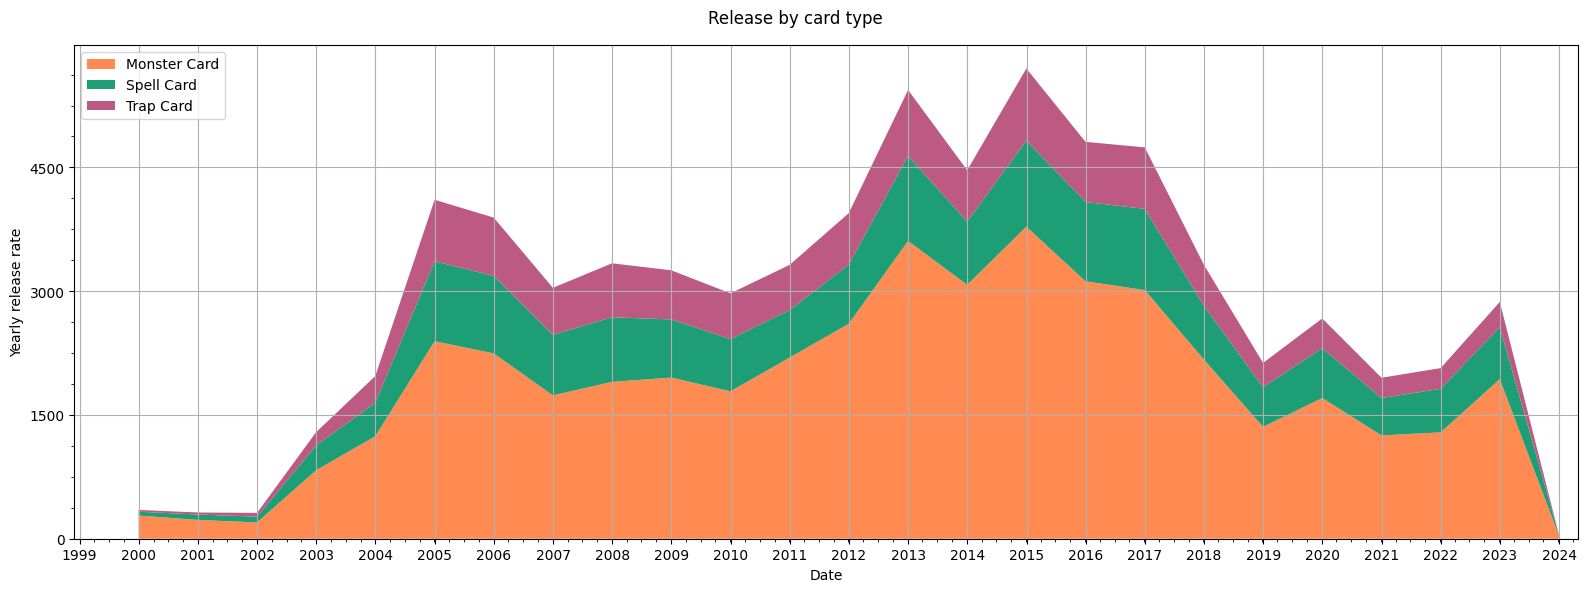

In [20]:
rate_plot(test, colors=colors, cumsum=False)

### By primary type

In [ ]:
test = full_df.groupby(['Primary type','Release'])['Name'].nunique().unstack(0).sort_index().fillna(0)
test.groupby(test.index.strftime('%Y')).sum().T

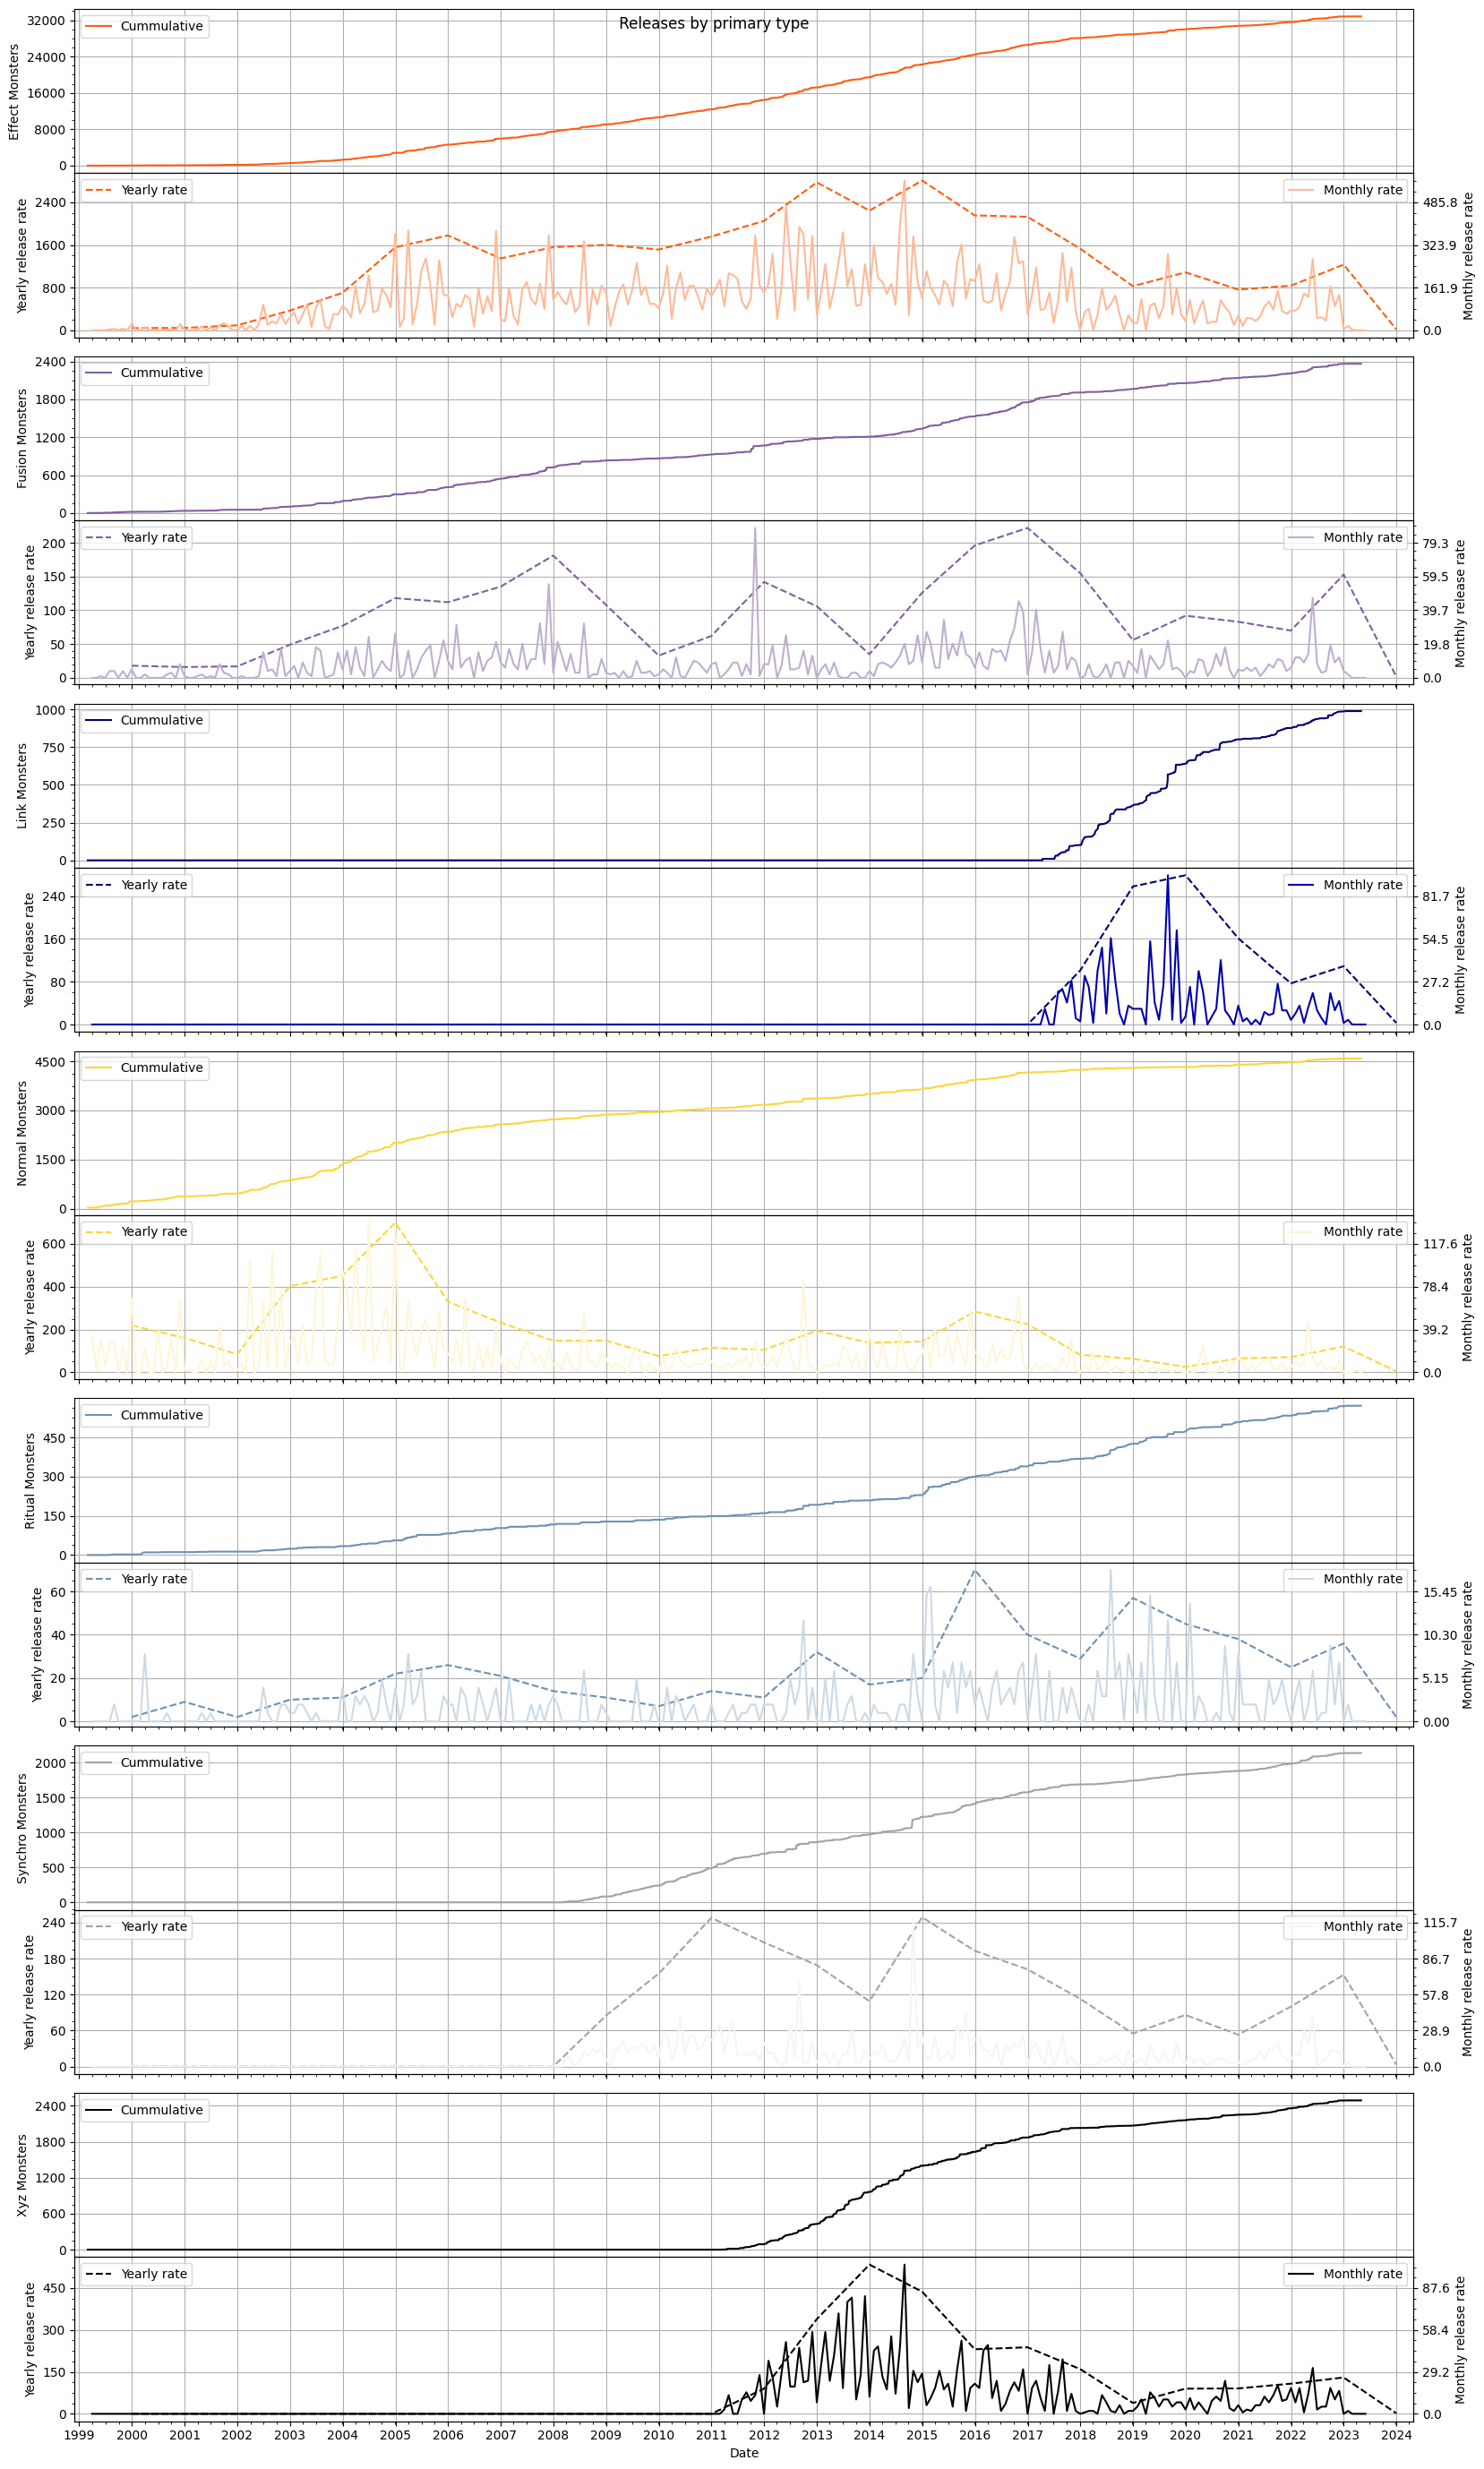

In [13]:
colors = [card_colors[col] for col in test.columns]
rate_subplots(test, colors=colors)

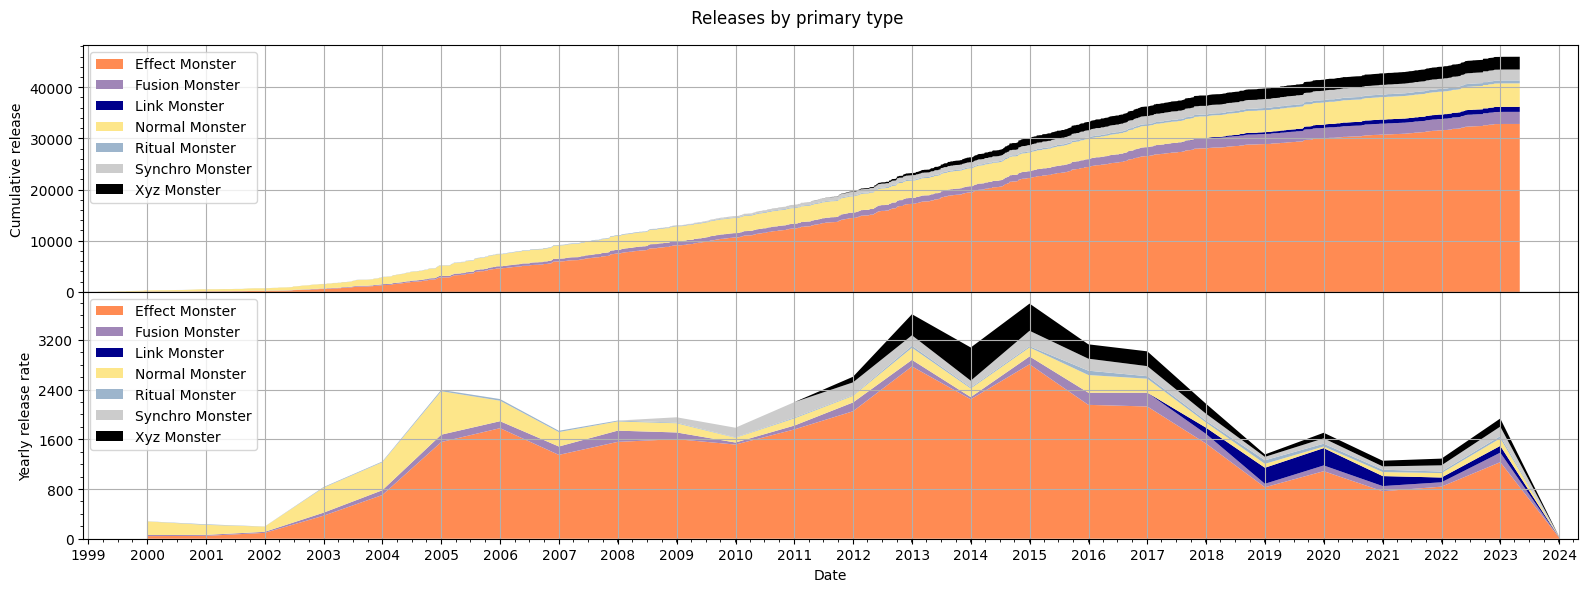

In [14]:
rate_plot(test, colors=colors)

### By secondary type

In [15]:
test = full_df.groupby(['Secondary type','Release'])['Name'].nunique().unstack(0).sort_index().fillna(0)
test.groupby(test.index.strftime('%Y')).sum().T

Release         1999  2000  2001  2002   2003   2004   2005  2006  2007  \
Secondary type                                                            
Flip monster    10.0  13.0  17.0  69.0  103.0  201.0  133.0  94.0  55.0   
Gemini monster   0.0   0.0   0.0   0.0    0.0    0.0    0.0   0.0  70.0   
Spirit monster   0.0   0.0   0.0   0.0   15.0   14.0   30.0  14.0   8.0   
Toon monster     0.0   0.0   0.0   4.0    8.0   26.0   10.0   9.0   1.0   
Tuner monster    0.0   0.0   0.0   0.0    0.0    0.0    0.0   0.0   0.0   
Union monster    0.0   0.0   0.0  10.0    4.0   15.0   51.0  25.0  20.0   

Release          2008   2009   2010   2011   2012   2013   2014   2015   2016  \
Secondary type                                                                  
Flip monster     83.0   51.0   55.0   61.0  108.0   54.0   97.0   61.0   37.0   
Gemini monster   23.0   21.0    1.0    7.0   33.0   23.0   12.0   15.0   43.0   
Spirit monster    9.0   16.0    5.0   11.0   16.0   15.0    5.0    1.0   13.0   
Toon monster      8.0    0.0    1.0    3.0   19.0    3.0    3.0   24.0   21.0   
Tuner monster   101.0  189.0  329.0  297.0  187.0  110.0  246.0  208.0  166.0   
Union monster    10.0    5.0   23.0    9.0   19.0    3.0    9.0    1.0   34.0   

Release          2017  2018  2019  2020   2021   2022  2023  
Secondary type                                               
Flip monster     71.0  23.0  16.0   9.0   18.0   24.0   0.0  
Gemini monster    7.0   1.0   0.0   2.0    3.0    1.0   0.0  
Spirit monster   36.0  13.0   0.0   0.0    3.0    7.0   1.0  
Toon monster      6.0   0.0   2.0   1.0    0.0    2.0   0.0  
Tuner monster   132.0  75.0  96.0  82.0  120.0  193.0   5.0  
Union monster     4.0   1.0   6.0   6.0    2.0    4.0   0.0

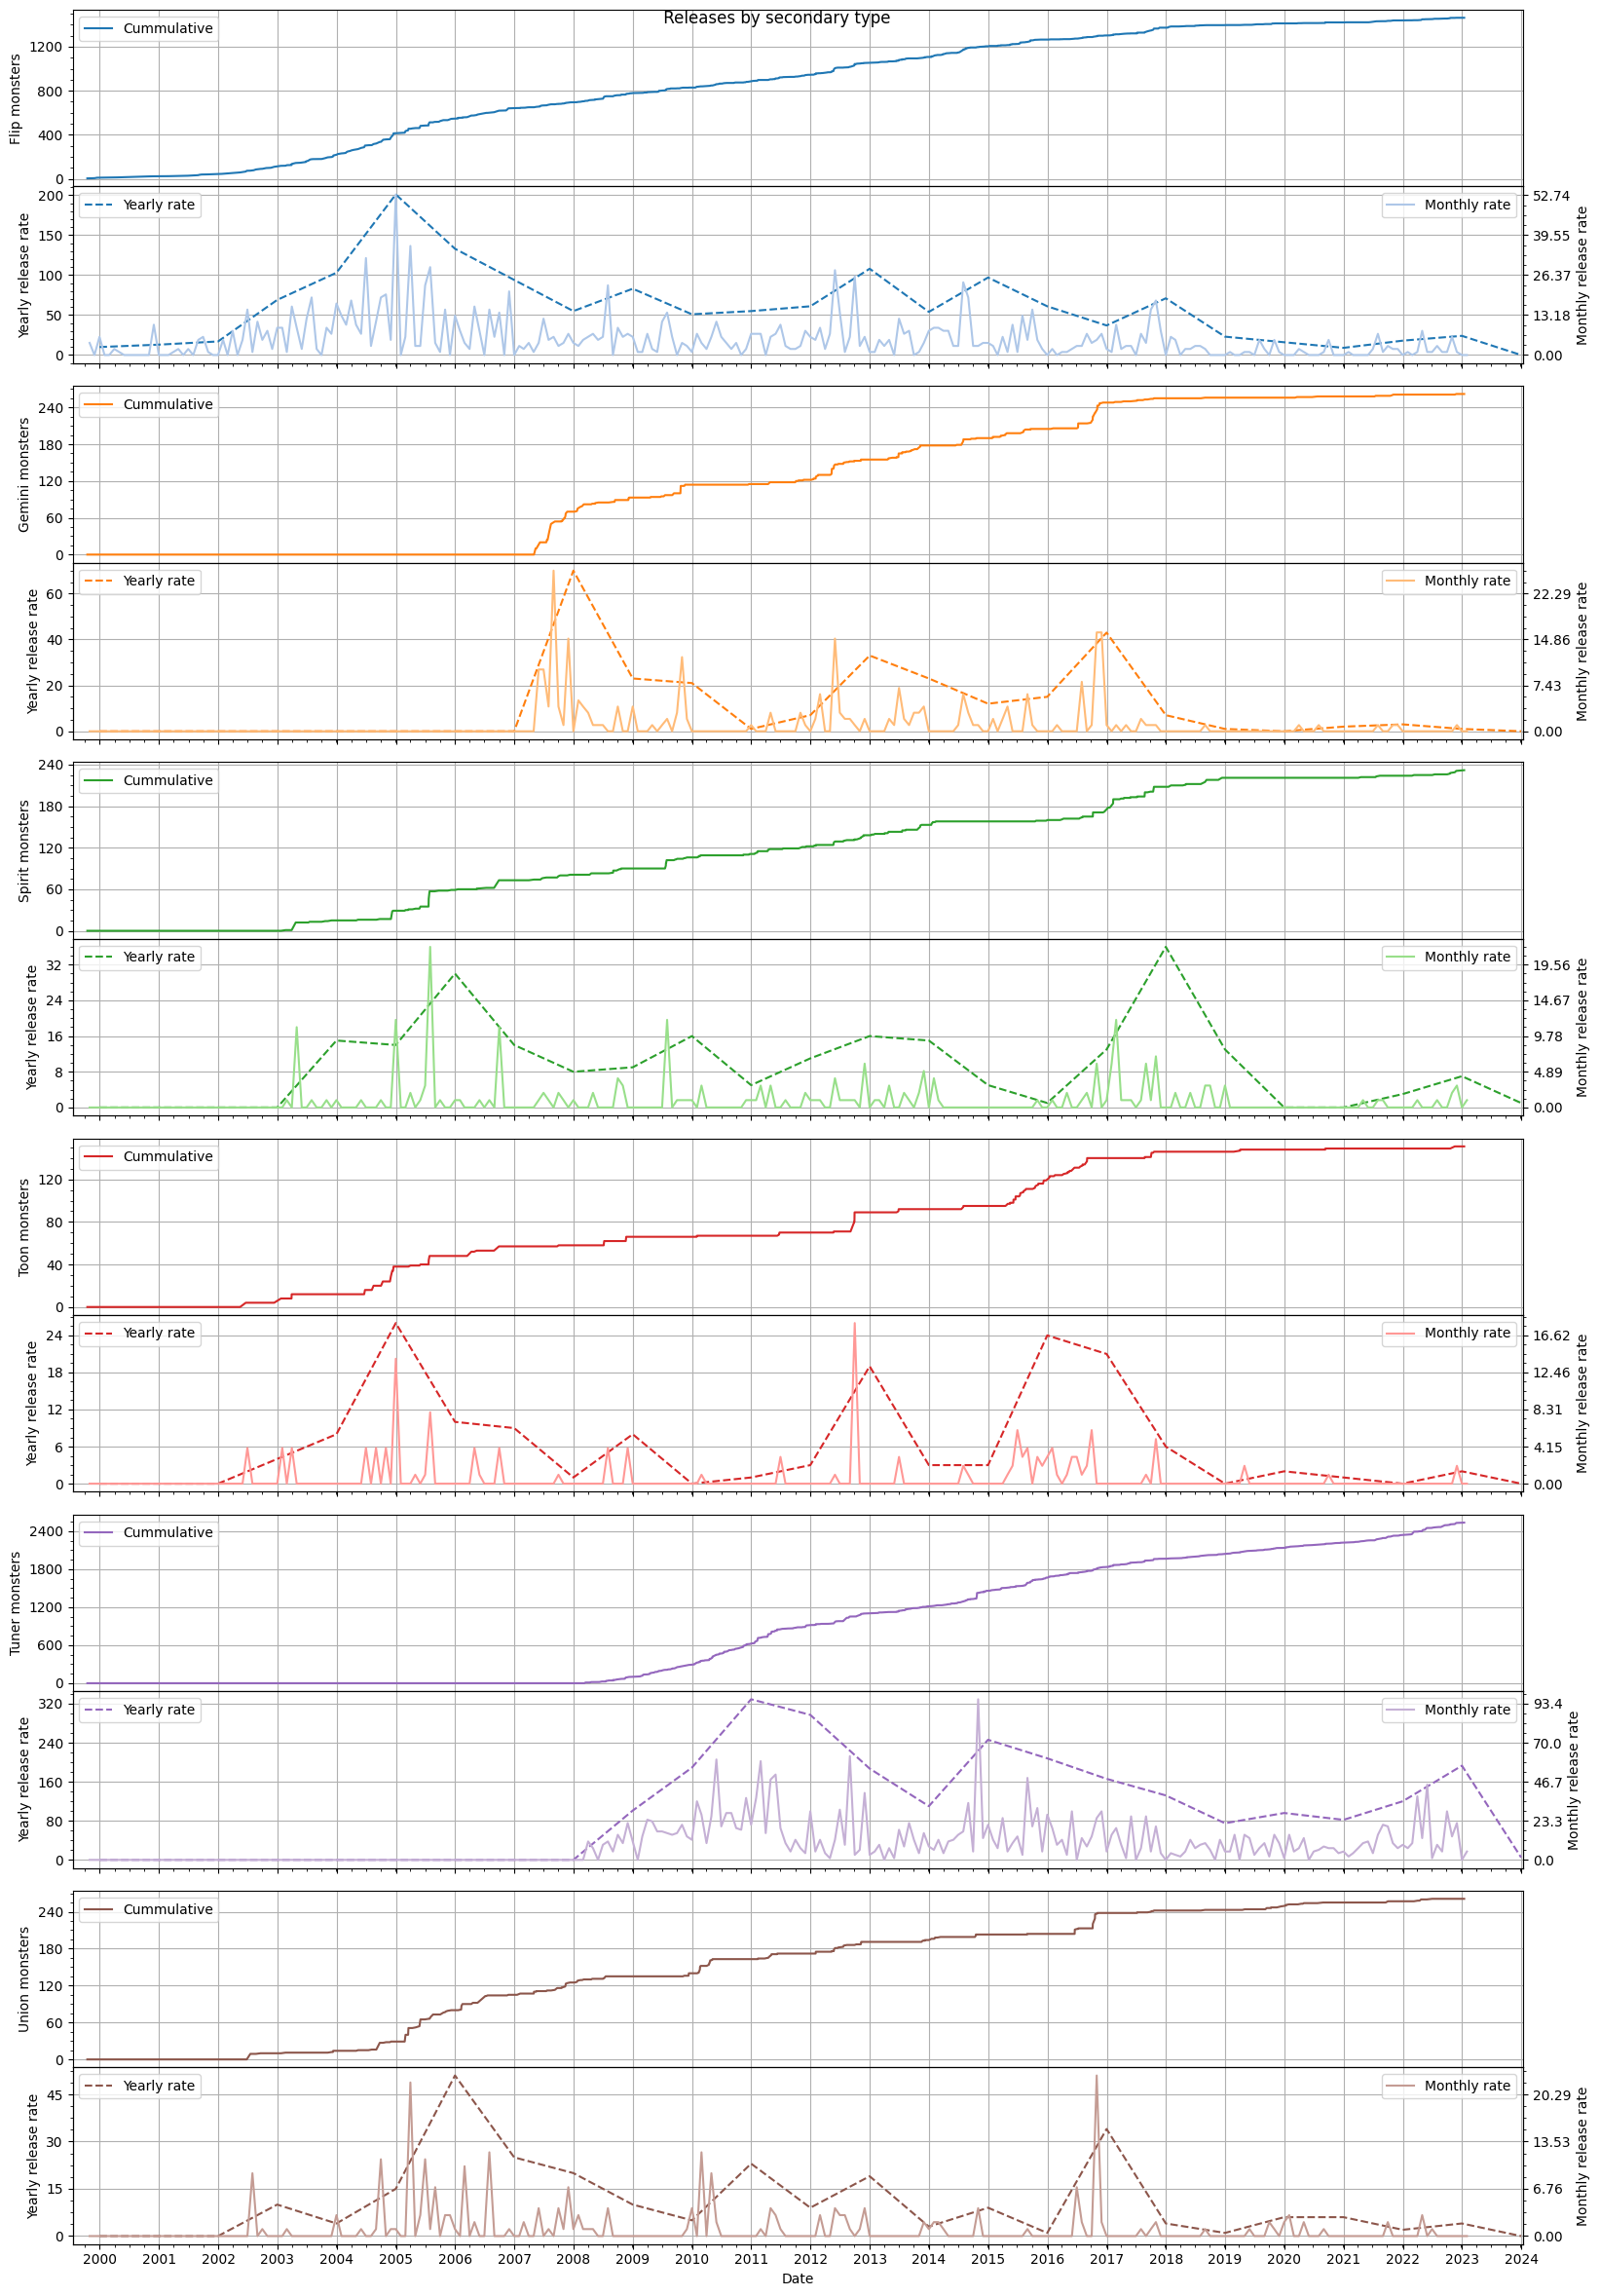

In [16]:
rate_subplots(test)

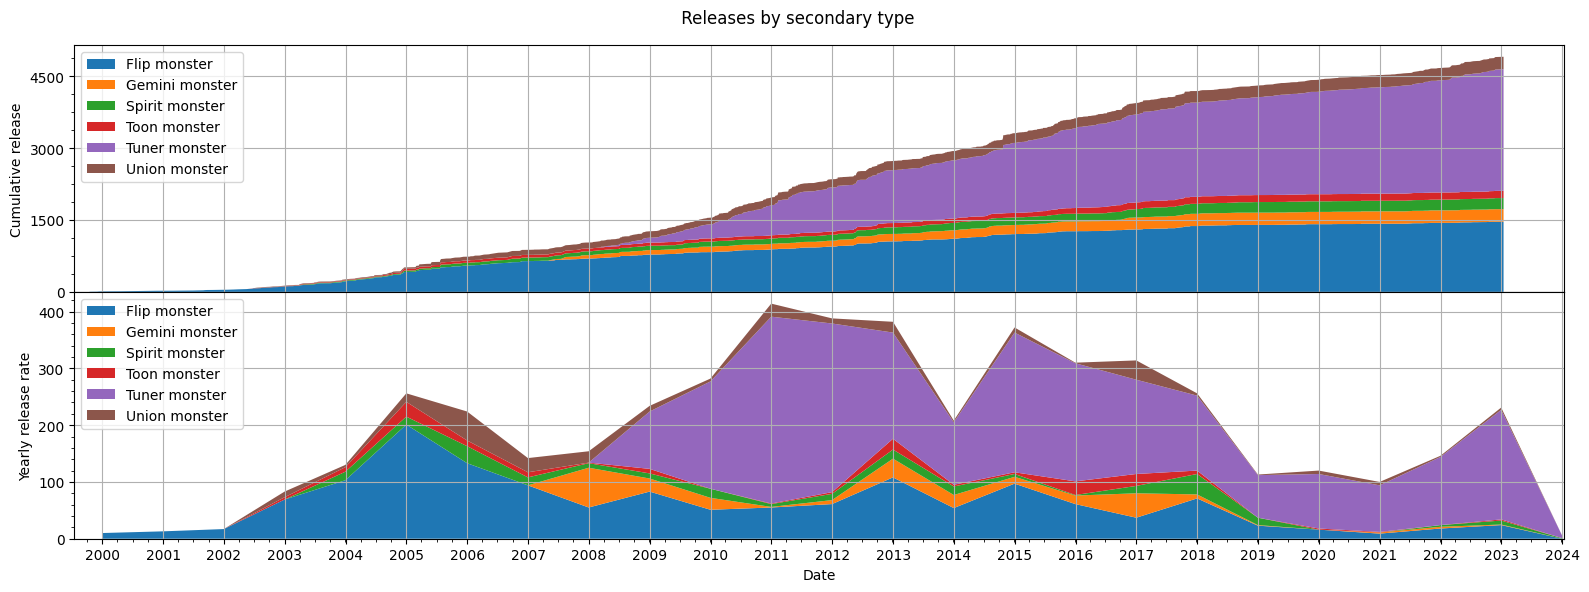

In [17]:
rate_plot(test)

### By attribute

In [18]:
test = full_df.groupby(['Attribute','Release'])['Name'].nunique().unstack(0).sort_index().fillna(0)
test.groupby(test.index.strftime('%Y')).sum().T

Release     1999  2000  2001   2002   2003   2004   2005   2006   2007   2008  \
Attribute                                                                       
DARK        80.0  75.0  53.0  276.0  391.0  702.0  588.0  386.0  431.0  566.0   
DIVINE       0.0   3.0   0.0    0.0    3.0    1.0    1.0    0.0    0.0    4.0   
EARTH      101.0  82.0  69.0  262.0  383.0  666.0  646.0  496.0  464.0  470.0   
FIRE         9.0   5.0  11.0   37.0   72.0  170.0  175.0  155.0  180.0  138.0   
LIGHT       26.0  20.0  20.0  111.0  160.0  372.0  439.0  363.0  419.0  450.0   
WATER       44.0  27.0  18.0   70.0  116.0  244.0  215.0  140.0  232.0  147.0   
WIND        21.0  16.0  26.0   74.0  117.0  239.0  182.0  197.0  175.0  178.0   

Release     2009   2010   2011   2012   2013   2014   2015    2016   2017  \
Attribute                                                                   
DARK       482.0  558.0  679.0  868.0  728.0  982.0  917.0  1108.0  711.0   
DIVINE       1.0    9.0    5.0    7.0    6.0   17.0   15.0    16.0    7.0   
EARTH      481.0  620.0  602.0  837.0  603.0  998.0  662.0   593.0  494.0   
FIRE       152.0  139.0  227.0  308.0  386.0  263.0  267.0   206.0  123.0   
LIGHT      321.0  479.0  547.0  861.0  781.0  924.0  692.0   696.0  442.0   
WATER      164.0  136.0  236.0  479.0  296.0  278.0  264.0   231.0  199.0   
WIND       185.0  254.0  309.0  249.0  277.0  320.0  303.0   164.0  194.0   

Release     2018   2019   2020   2021   2022  2023  
Attribute                                           
DARK       450.0  625.0  358.0  320.0  644.0  14.0  
DIVINE       0.0   11.0    6.0    2.0    2.0   0.0  
EARTH      211.0  284.0  254.0  174.0  371.0   6.0  
FIRE        89.0  124.0  108.0  105.0  115.0   1.0  
LIGHT      362.0  394.0  241.0  282.0  360.0  12.0  
WATER       72.0  122.0  179.0  205.0  222.0   1.0  
WIND       172.0  145.0  106.0  201.0  220.0   2.0

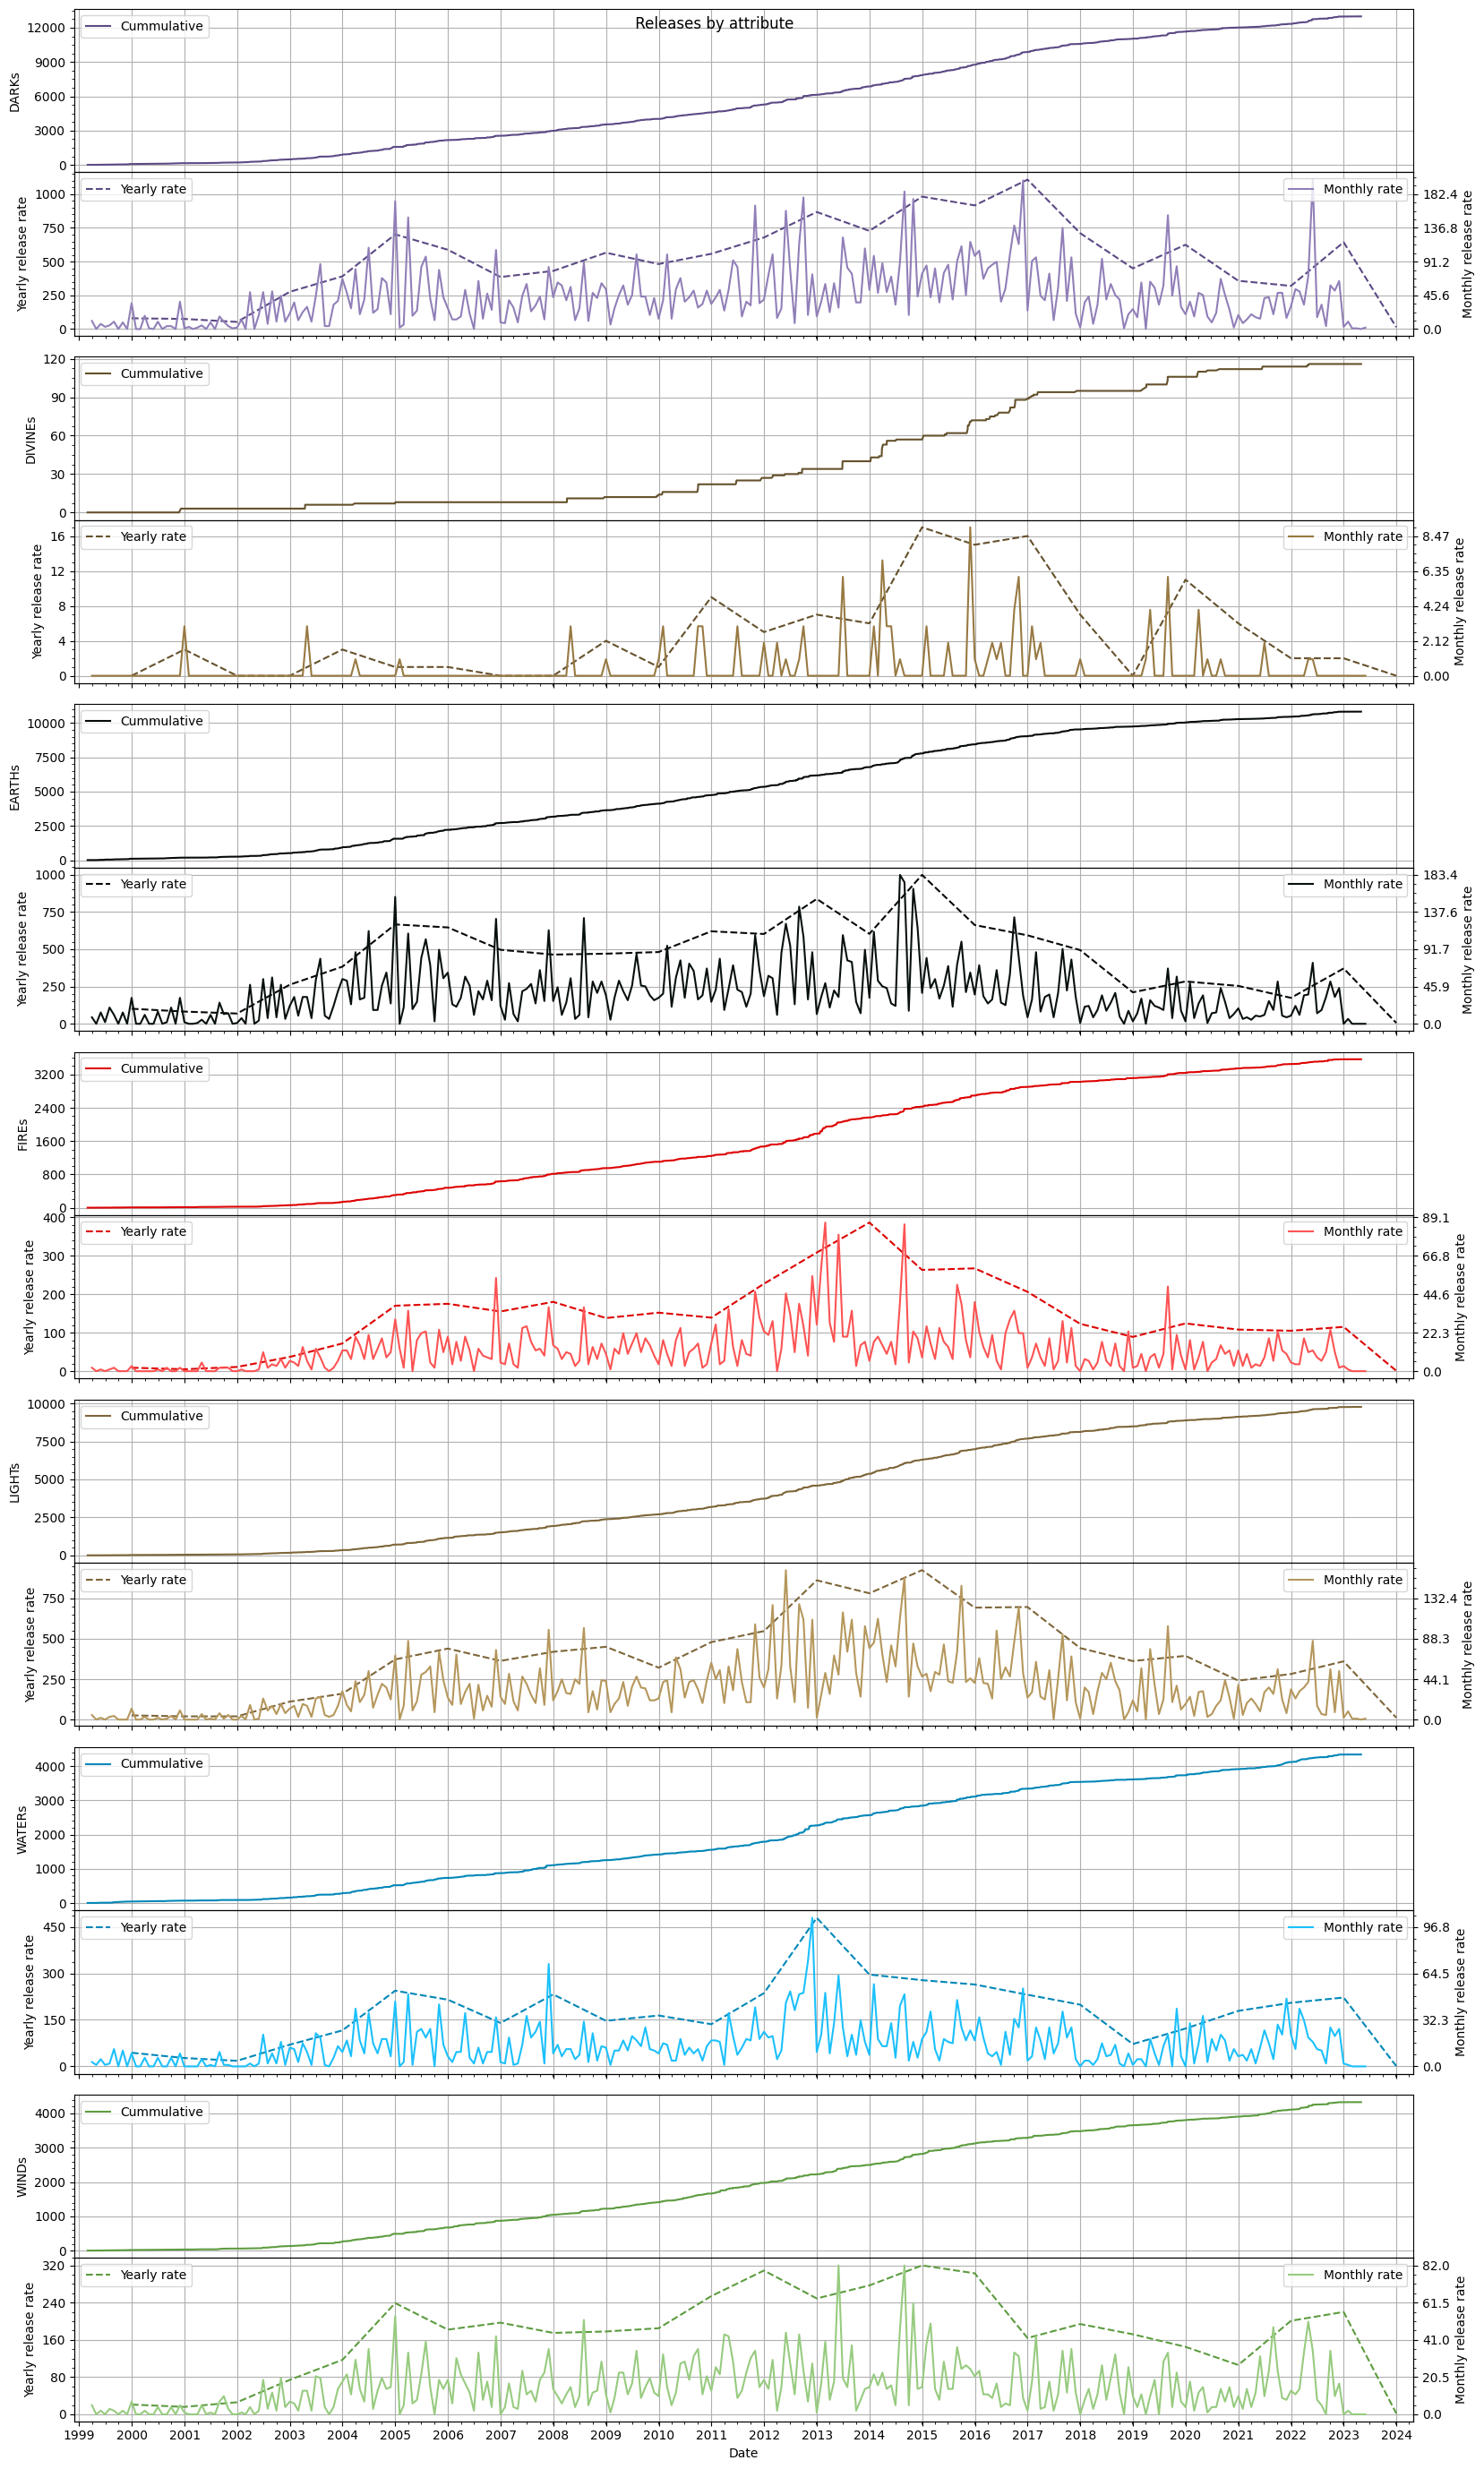

In [19]:
colors = [card_colors[col] for col in test.columns]
rate_subplots(test, colors=colors)

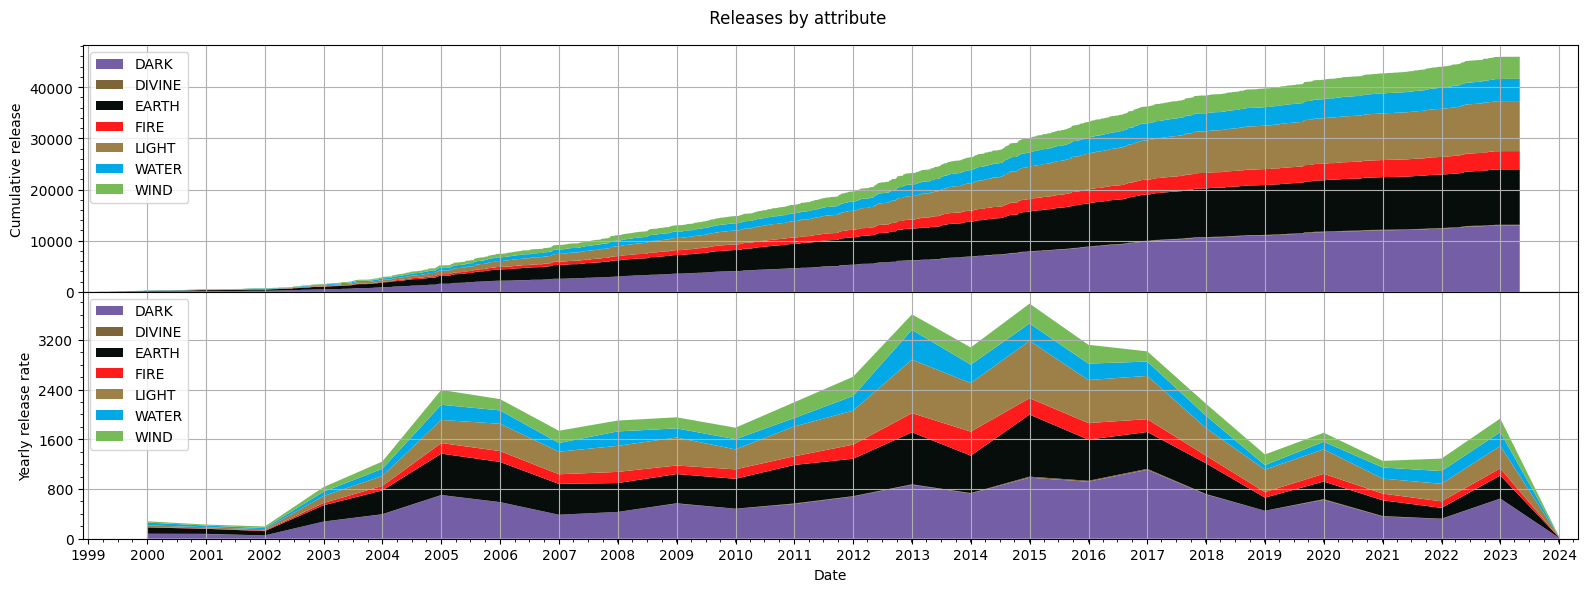

In [20]:
rate_plot(test, colors = colors)

### By monster type

In [21]:
test = full_df.groupby(['Monster type','Release'])['Name'].nunique().unstack(0).sort_index().fillna(0)
test.groupby(test.index.strftime('%Y')).sum().T

Release        1999  2000  2001   2002   2003   2004   2005   2006   2007  \
Monster type                                                                
Aqua           26.0  15.0  12.0   45.0   72.0  126.0   79.0   55.0   60.0   
Beast          20.0  14.0   8.0   52.0   75.0  131.0  158.0   93.0   97.0   
Beast-Warrior  11.0  10.0   8.0   32.0   36.0   56.0   63.0   44.0   50.0   
Creator God     0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Cyberse         0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Dinosaur        7.0   8.0   3.0   16.0   13.0   37.0   39.0   51.0   36.0   
Divine-Beast    0.0   3.0   0.0    0.0    3.0    1.0    1.0    0.0    0.0   
Dragon         16.0  17.0  22.0   54.0   62.0  119.0   95.0   75.0  105.0   
Fairy          12.0   7.0  12.0   32.0   59.0  162.0  133.0  127.0  171.0   
Fiend          39.0  42.0  31.0  118.0  185.0  328.0  265.0  173.0  217.0   
Fish            8.0   4.0   4.0   14.0   24.0   46.0   28.0   15.0   24.0   
Insect         14.0  12.0   8.0   40.0   67.0  134.0   74.0   75.0   55.0   
Machine        14.0   7.0   9.0   59.0   84.0  169.0  254.0  212.0  244.0   
Plant           8.0   3.0   4.0   11.0   13.0   37.0   35.0   24.0   33.0   
Psychic         0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Pyro            3.0   1.0   2.0   13.0   28.0   79.0   72.0   50.0   66.0   
Reptile         5.0   2.0   2.0    9.0   25.0   47.0   41.0   28.0   79.0   
Rock           10.0  11.0   9.0   24.0   43.0   79.0  112.0   94.0   55.0   
Sea Serpent     2.0   1.0   1.0    4.0    4.0   11.0   27.0   12.0   17.0   
Spellcaster    27.0  20.0  17.0  118.0  159.0  285.0  249.0  159.0  127.0   
Thunder         2.0   3.0   1.0   19.0   31.0   48.0   36.0   34.0   30.0   
Warrior        32.0  32.0  36.0  110.0  168.0  320.0  342.0  311.0  333.0   
Winged Beast   10.0   7.0   6.0   28.0   35.0   85.0   45.0   65.0   61.0   
Wyrm            0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Zombie         15.0   9.0   2.0   32.0   56.0   94.0   98.0   40.0   41.0   

Release         2008   2009   2010   2011   2012   2013   2014   2015   2016  \
Monster type                                                                   
Aqua            46.0   44.0   38.0   77.0  157.0   72.0   82.0   77.0   58.0   
Beast           77.0   85.0  141.0  154.0  168.0  155.0  217.0  124.0  118.0   
Beast-Warrior   31.0   48.0   47.0   56.0   85.0  208.0  137.0   75.0  102.0   
Creator God      0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   
Cyberse          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Dinosaur        32.0   27.0   29.0   63.0   63.0   31.0   52.0   12.0   19.0   
Divine-Beast     4.0    1.0    9.0    4.0    7.0    6.0   17.0   15.0   16.0   
Dragon         140.0  162.0  221.0  229.0  343.0  323.0  284.0  327.0  412.0   
Fairy          128.0   57.0   98.0  199.0  153.0  141.0  251.0  190.0  148.0   
Fiend          179.0  128.0  210.0  264.0  259.0  244.0  309.0  418.0  290.0   
Fish            31.0   26.0   13.0   42.0   74.0   91.0   67.0   22.0   11.0   
Insect          67.0   72.0   74.0   60.0  113.0   54.0   77.0   37.0   65.0   
Machine        242.0  212.0  340.0  262.0  364.0  379.0  541.0  385.0  418.0   
Plant           62.0   70.0   77.0   64.0   59.0   69.0  175.0   58.0   53.0   
Psychic         43.0   42.0   34.0   66.0   50.0   49.0   60.0   99.0   85.0   
Pyro            39.0   25.0   45.0   64.0   95.0   67.0   53.0   31.0   14.0   
Reptile         36.0   62.0   74.0   58.0  100.0   40.0   36.0   31.0   23.0   
Rock            66.0   56.0   48.0   56.0  159.0  107.0  152.0   84.0  109.0   
Sea Serpent     15.0   40.0   23.0   24.0  121.0   49.0   30.0   25.0   14.0   
Spellcaster    183.0  190.0  147.0  145.0  341.0  261.0  295.0  340.0  346.0   
Thunder         44.0   20.0   78.0   44.0   72.0   39.0   45.0   36.0   21.0   
Warrior        346.0  266.0  286.0  476.0  652.0  448.0  540.0  462.0  428.0   


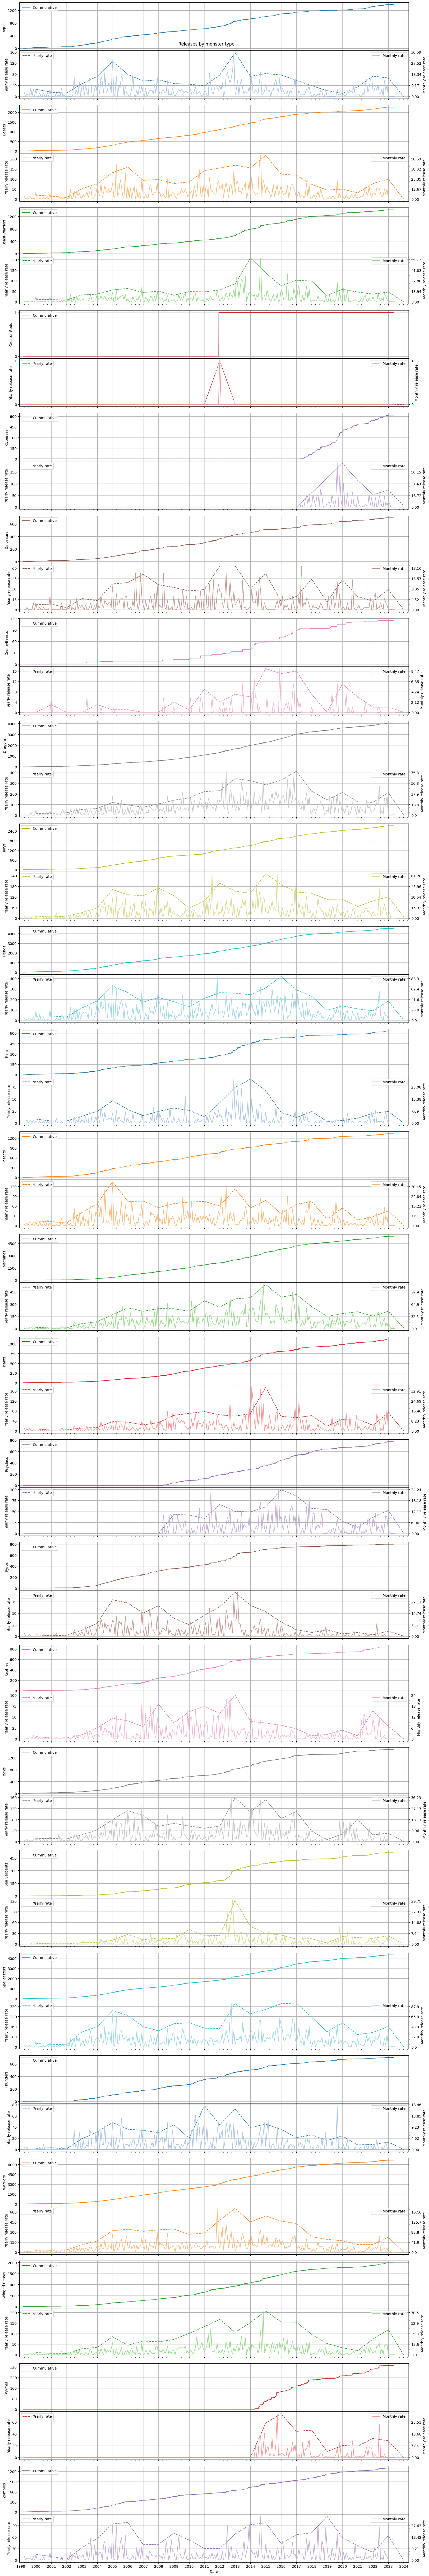

In [22]:
rate_subplots(test)

### By Level/Rank

In [23]:
def boxplot(df):
    col = df.columns[0]
    df['Year'] = df.index.strftime('%Y')
    df.dropna(inplace=True)

    ax = df.boxplot(by='Year', figsize=(16,10))

    mean = df.groupby('Year').mean()

    ax.plot(list(range(1,len(mean.index)+1)), mean.values, c='r', ls='--', alpha=0.5)
    
    ticks = np.arange(0,df[col].max()+1,1)
    if len(ticks)>15:
        ax.yaxis.set_major_locator(MaxNLocator(11, integer=True))
        ax.yaxis.set_minor_locator(AutoMinorLocator())
    else:
        ax.yaxis.set_major_locator(FixedLocator(ticks))
        
    # ax.set_ylim([0,5000])
    plt.tight_layout()
    plt.show()

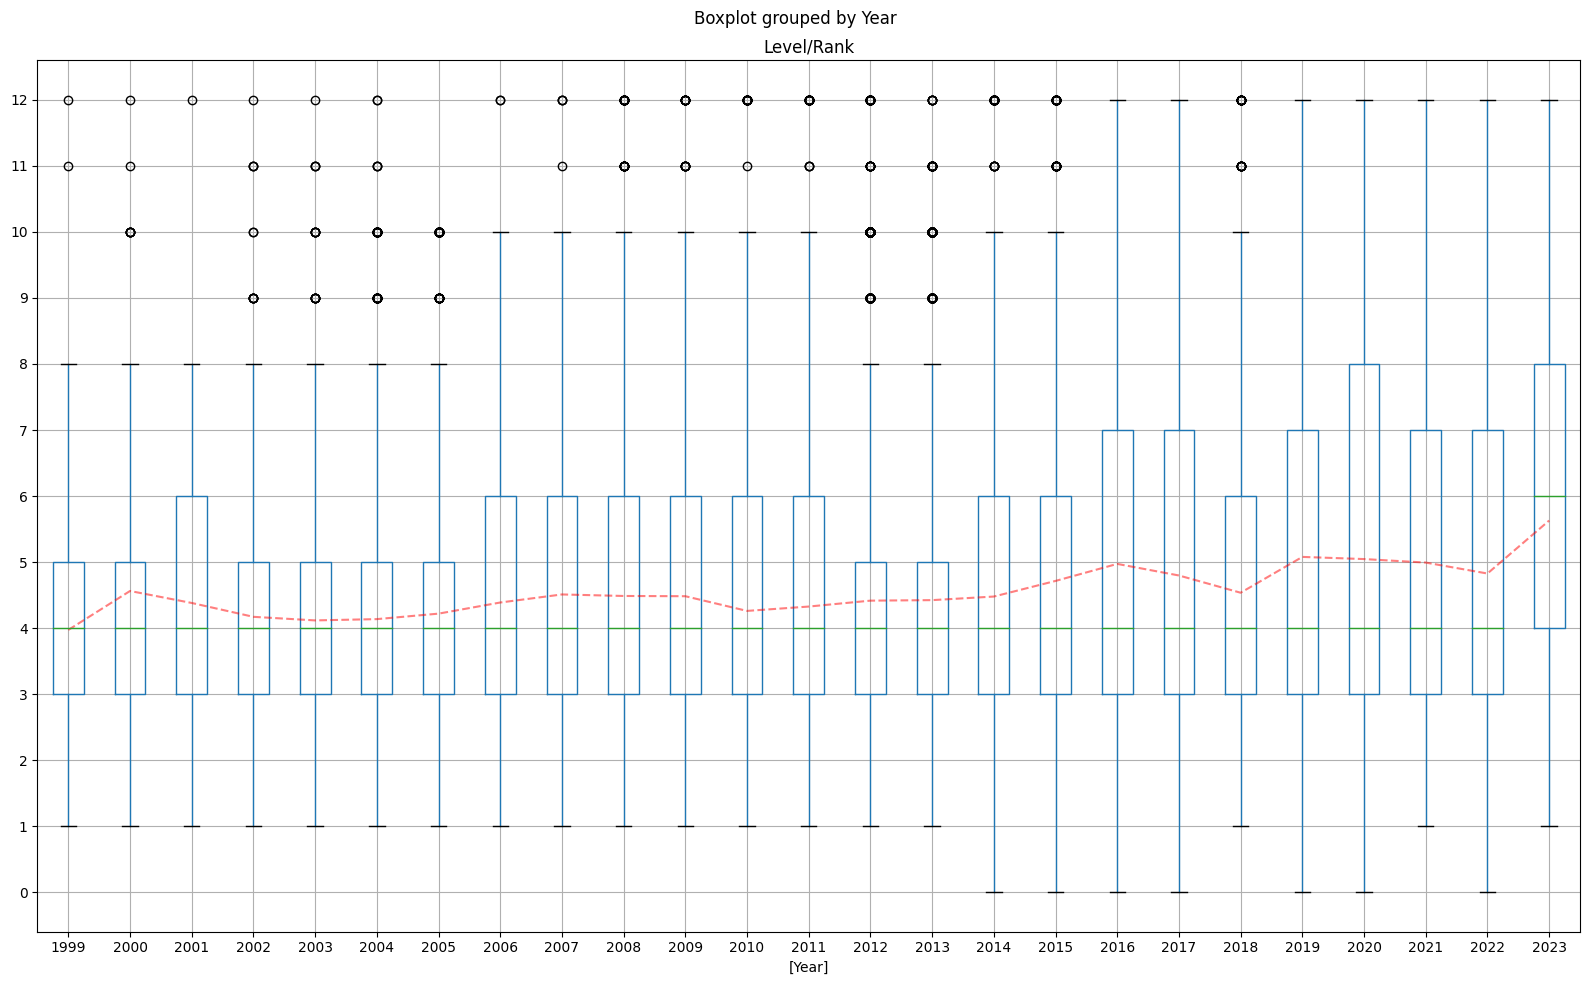

In [24]:
box = pd.to_numeric(full_df.set_index('Release')['Level/Rank'], errors='coerce').to_frame().sort_index().dropna()
boxplot(box)

### By ATK

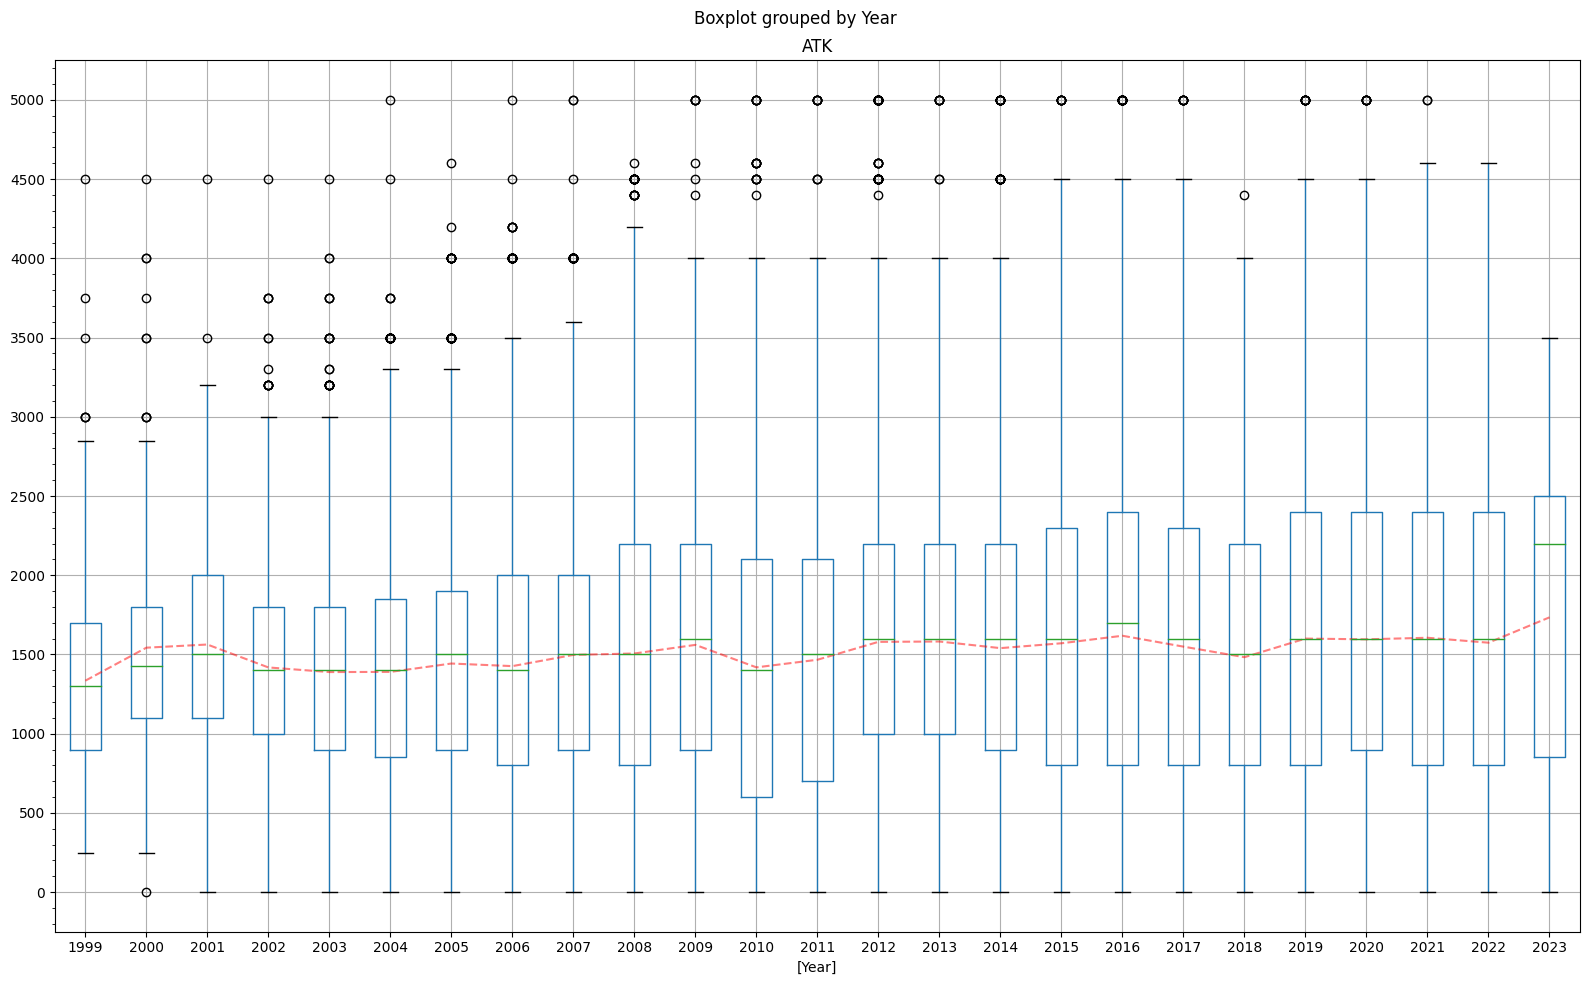

In [25]:
box = pd.to_numeric(full_df.set_index('Release')['ATK'], errors='coerce').to_frame().sort_index().dropna()
boxplot(box)

### By DEF

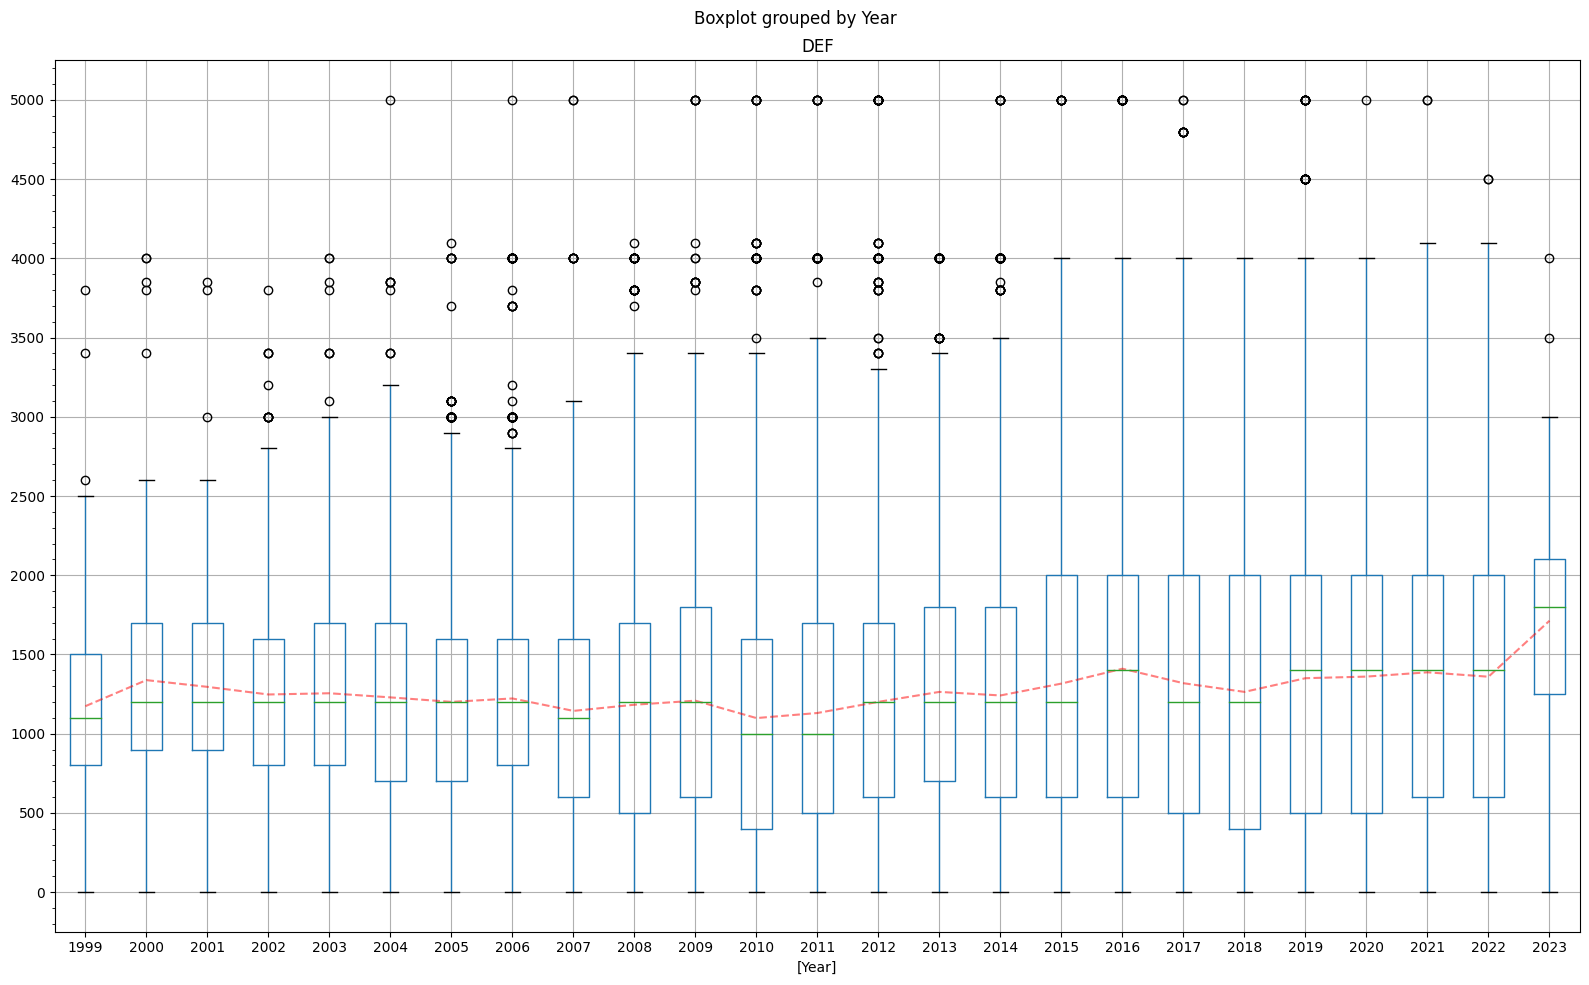

In [26]:
box = pd.to_numeric(full_df.set_index('Release')['DEF'], errors='coerce').to_frame().sort_index().dropna()
boxplot(box)

### By pendulum scale

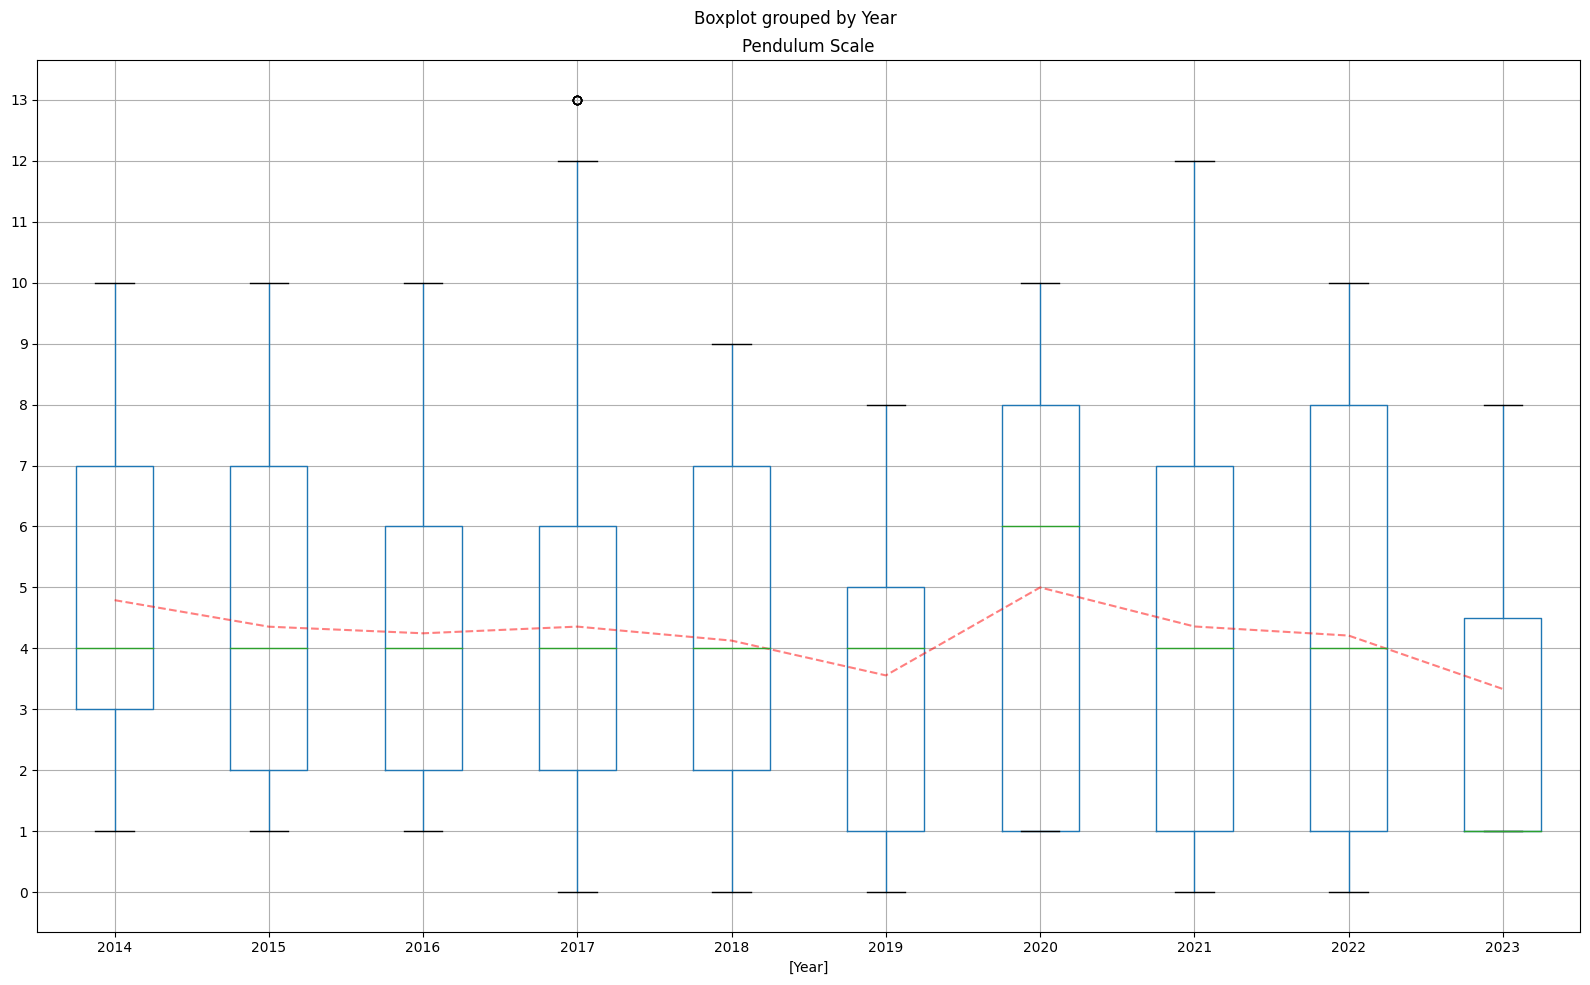

In [27]:
box = pd.to_numeric(full_df.set_index('Release')['Pendulum Scale'], errors='coerce').to_frame().sort_index().dropna()
boxplot(box)

### By link

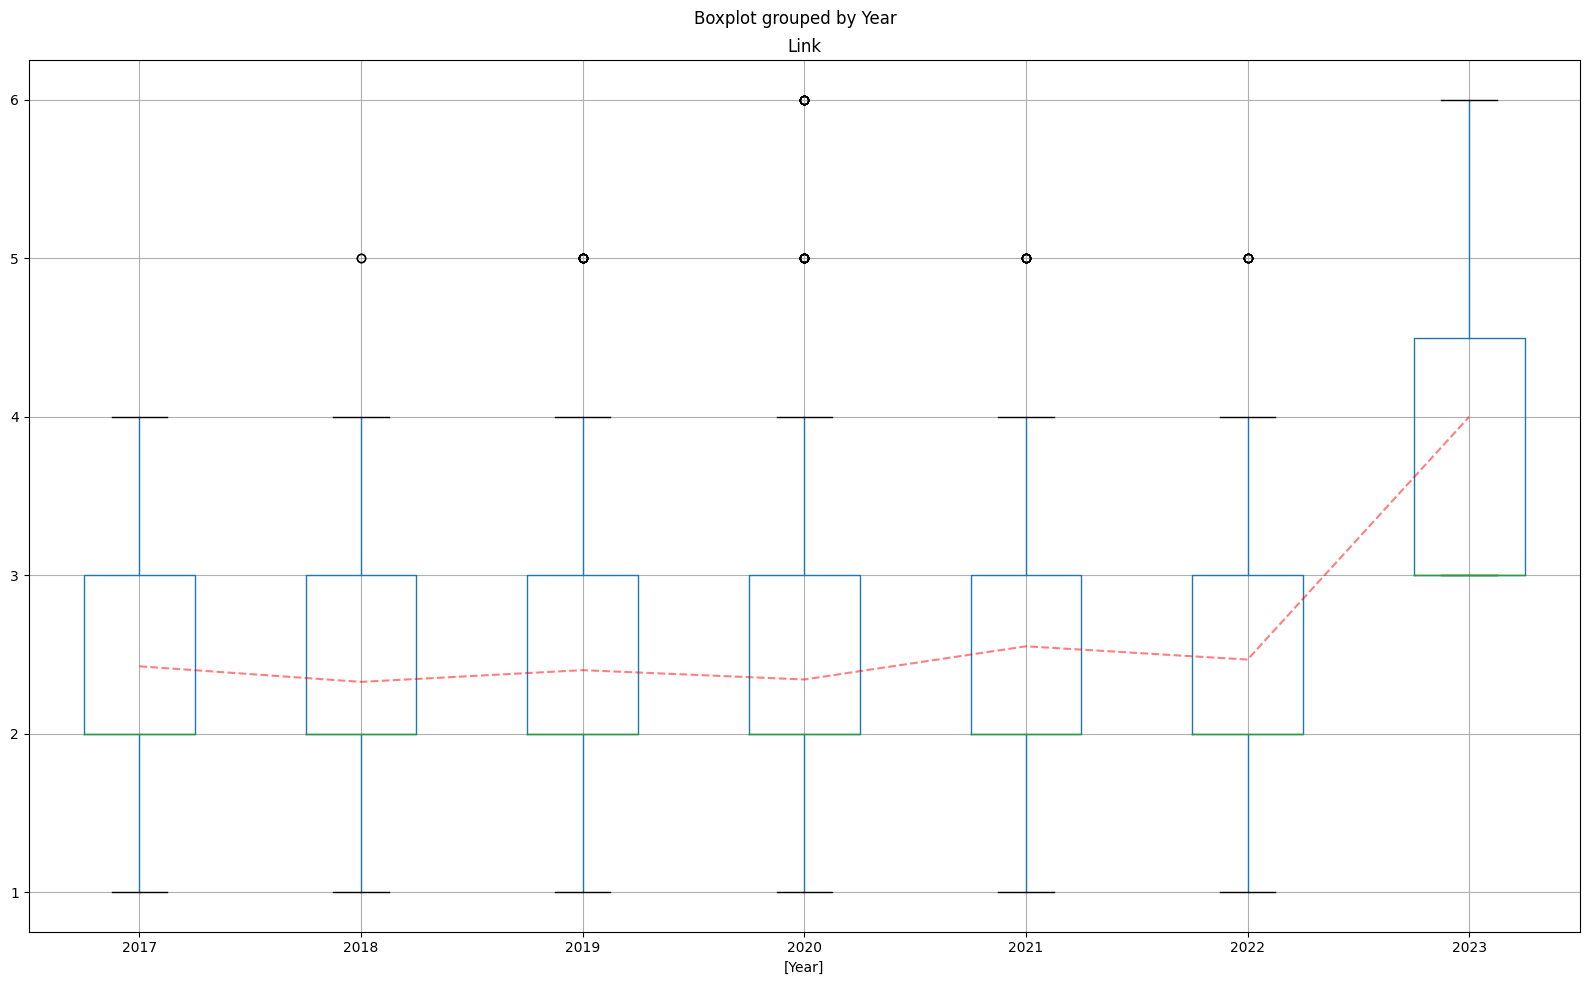

In [28]:
box = pd.to_numeric(full_df.set_index('Release')['Link'], errors='coerce').to_frame().sort_index().dropna()
boxplot(box)

# Debug

In [ ]:
full_df['_merge'].value_counts()

In [ ]:
full_df.where(full_df['_merge']=='right_only').dropna(axis=0,how='all')

In [ ]:
full_df.where(full_df['_merge']=='left_only').dropna(axis=0,how='all')

In [ ]:
full_df['Modification date'].nunique()